In [34]:
import datetime
import time
import numpy as np
import pandas as pd
from packaging import version
from collections import Counter

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [2]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

In [3]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions))))

In [4]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

Dataset 1: Cifar-10

In [75]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [273]:
#Keras does not have a pre-built LeNet5 version, so we will create our own
def build_lenet5(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(num_classes, 'softmax'))
    return model

# Instantiate the model
input_shape = (32, 32, 3)
num_classes = 10
model1_1 = build_lenet5(input_shape, num_classes)

In [38]:
model1_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
start_time = time.time()
history1_1 = model1_1.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_1_1 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_1_1}s')

Epoch 1/10
1407/1407 [==============================] - 26s 17ms/step - loss: 1.8116 - accuracy: 0.3606 - val_loss: 1.7540 - val_accuracy: 0.3822
Epoch 2/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5984 - accuracy: 0.4363 - val_loss: 1.5356 - val_accuracy: 0.4534
Epoch 3/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4859 - accuracy: 0.4761 - val_loss: 1.4903 - val_accuracy: 0.4720
Epoch 4/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.4195 - accuracy: 0.4985 - val_loss: 1.4940 - val_accuracy: 0.4706
Epoch 5/10
1407/1407 [==============================] - 22s 16ms/step - loss: 1.3665 - accuracy: 0.5162 - val_loss: 1.4081 - val_accuracy: 0.5016
Epoch 6/10
1407/1407 [==============================] - 21s 15ms/step - loss: 1.3202 - accuracy: 0.5328 - val_loss: 1.3780 - val_accuracy: 0.5160
Epoch 7/10
1407/1407 [==============================] - 22s 15ms/step - loss: 1.2729 - accuracy: 0.5504 - val_loss: 1.3620 -

In [40]:
test_loss1_1, test_acc1_1 = model1_1.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc1_1}, Test loss: {test_loss1_1}")

313/313 - 2s - loss: 1.3522 - accuracy: 0.5251 - 2s/epoch - 8ms/step
Test accuracy: 0.5250999927520752, Test loss: 1.3522425889968872


In [41]:
pred1_1= model1_1.predict(test_images)
pred1_1=np.argmax(pred1_1, axis=1)

313/313 [==============================] - 3s 9ms/step


In [42]:
print_validation_report(np.argmax(test_labels, axis=1), pred1_1)

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.62      0.64      0.63      1000
           2       0.42      0.38      0.40      1000
           3       0.35      0.37      0.36      1000
           4       0.51      0.41      0.45      1000
           5       0.44      0.45      0.45      1000
           6       0.56      0.65      0.60      1000
           7       0.61      0.57      0.59      1000
           8       0.59      0.65      0.62      1000
           9       0.58      0.55      0.56      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000

Accuracy Score: 0.5251
Root Mean Square Error: 3.0629071157970165


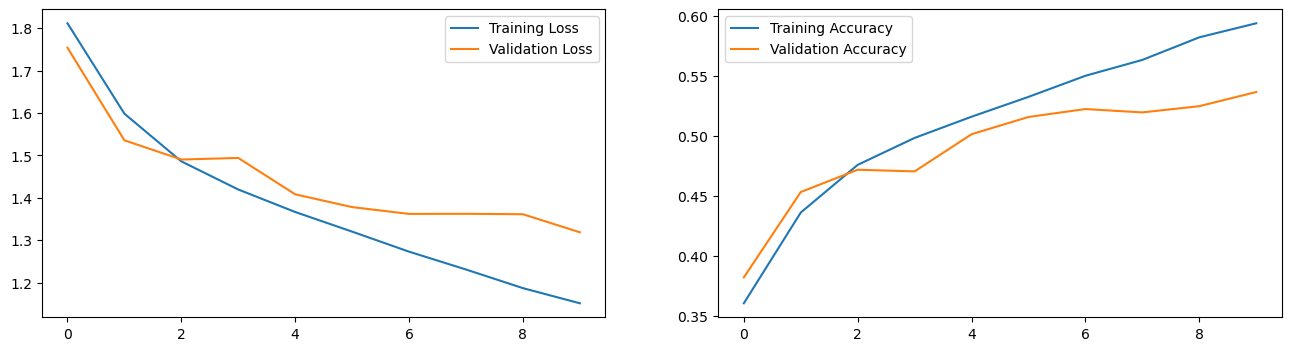

In [43]:
plot_history(history1_1)

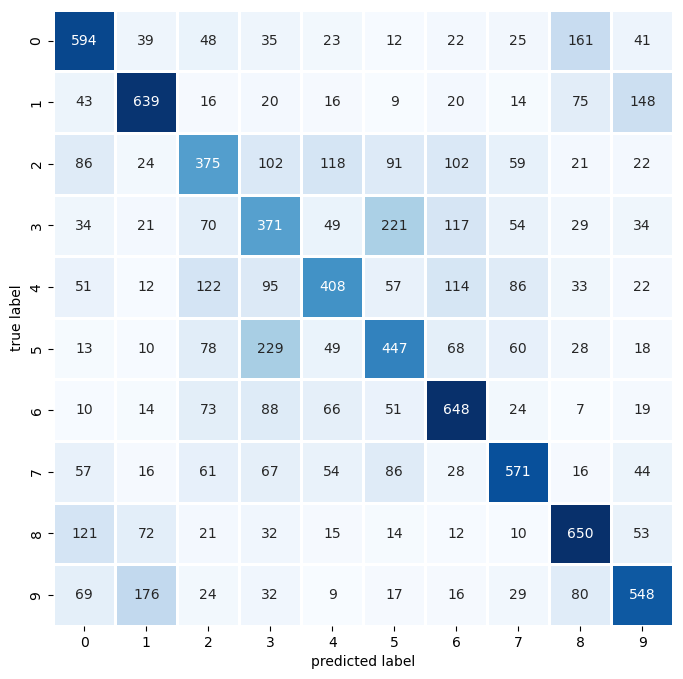

In [63]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred1_1)

VGG16

In [45]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load pre-trained VGG16 model (without top classification layer)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification head
model1_2 = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for Cifar-10
])

In [46]:
model1_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
start_time = time.time()
history1_2 = model1_2.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_1_2 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_1_2}s')

Epoch 1/10
1407/1407 [==============================] - 394s 278ms/step - loss: 1.3421 - accuracy: 0.5297 - val_loss: 1.2047 - val_accuracy: 0.5752
Epoch 2/10
1407/1407 [==============================] - 381s 271ms/step - loss: 1.1627 - accuracy: 0.5934 - val_loss: 1.1888 - val_accuracy: 0.5822
Epoch 3/10
1407/1407 [==============================] - 366s 260ms/step - loss: 1.0917 - accuracy: 0.6181 - val_loss: 1.1144 - val_accuracy: 0.6018
Epoch 4/10
1407/1407 [==============================] - 264s 188ms/step - loss: 1.0313 - accuracy: 0.6400 - val_loss: 1.0786 - val_accuracy: 0.6268
Epoch 5/10
1407/1407 [==============================] - 272s 193ms/step - loss: 0.9809 - accuracy: 0.6560 - val_loss: 1.0706 - val_accuracy: 0.6260
Epoch 6/10
1407/1407 [==============================] - 272s 193ms/step - loss: 0.9326 - accuracy: 0.6734 - val_loss: 1.1006 - val_accuracy: 0.6242
Epoch 7/10
1407/1407 [==============================] - 279s 199ms/step - loss: 0.8896 - accuracy: 0.6874 - val_

In [48]:
test_loss1_2, test_acc1_2 = model1_2.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc1_2}, Test loss: {test_loss1_2}")

313/313 - 52s - loss: 1.1546 - accuracy: 0.6163 - 52s/epoch - 167ms/step
Test accuracy: 0.6162999868392944, Test loss: 1.1545954942703247


In [49]:
pred1_2= model1_2.predict(test_images)
pred1_2=np.argmax(pred1_2, axis=1)

313/313 [==============================] - 82s 262ms/step


In [50]:
print_validation_report(np.argmax(test_labels, axis=1), pred1_2)

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1000
           1       0.63      0.78      0.70      1000
           2       0.57      0.53      0.55      1000
           3       0.39      0.58      0.47      1000
           4       0.62      0.51      0.56      1000
           5       0.63      0.41      0.50      1000
           6       0.68      0.62      0.65      1000
           7       0.69      0.69      0.69      1000
           8       0.68      0.79      0.73      1000
           9       0.66      0.58      0.62      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000

Accuracy Score: 0.6163
Root Mean Square Error: 2.6688574334347646


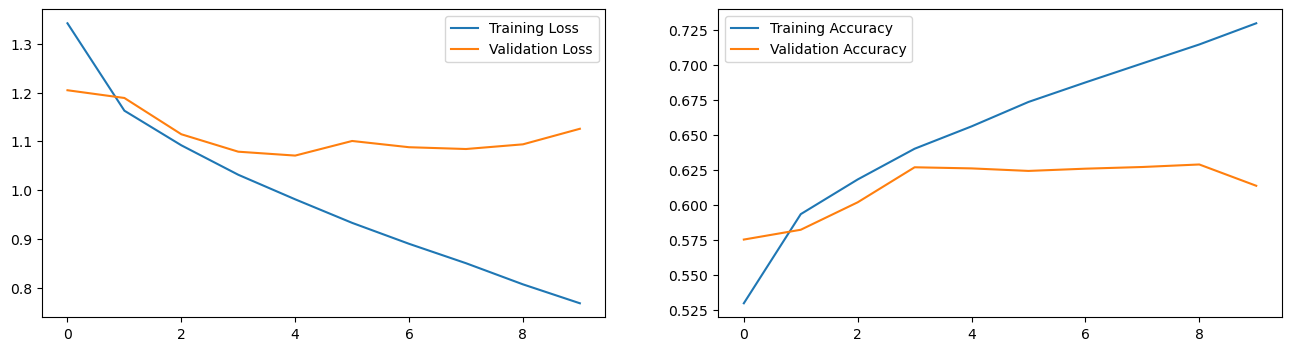

In [51]:
plot_history(history1_2)

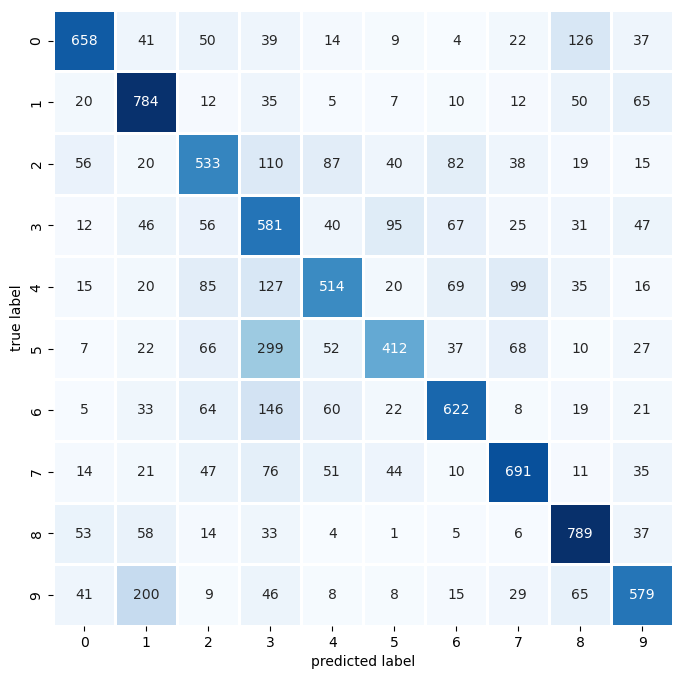

In [52]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred1_2)

InceptionV3

In [77]:
train_images_resized = tf.image.resize(train_images, [75, 75])
test_images_resized = tf.image.resize(test_images, [75, 75])

In [55]:
# Define the InceptionV3 model
from tensorflow.keras.applications import InceptionV3
def build_inceptionv3(input_shape, num_classes):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=base_model.input, outputs=outputs)
    
    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    return model

input_shape = (75, 75, 3)
num_classes = 10
model1_3 = build_inceptionv3(input_shape, num_classes)

87910968/87910968 [==============================] - 113s 1us/step


In [56]:
model1_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
start_time = time.time()
history1_3 = model1_3.fit(train_images_resized, train_labels, epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_1_3 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_1_3}s')

Epoch 1/10
1407/1407 [==============================] - 284s 192ms/step - loss: 1.3425 - accuracy: 0.5389 - val_loss: 1.1343 - val_accuracy: 0.5954
Epoch 2/10
1407/1407 [==============================] - 267s 190ms/step - loss: 1.1284 - accuracy: 0.6062 - val_loss: 1.0801 - val_accuracy: 0.6174
Epoch 3/10
1407/1407 [==============================] - 255s 181ms/step - loss: 1.0477 - accuracy: 0.6352 - val_loss: 1.0786 - val_accuracy: 0.6178
Epoch 4/10
1407/1407 [==============================] - 264s 188ms/step - loss: 0.9651 - accuracy: 0.6608 - val_loss: 1.0656 - val_accuracy: 0.6242
Epoch 5/10
1407/1407 [==============================] - 250s 178ms/step - loss: 0.8821 - accuracy: 0.6898 - val_loss: 1.0823 - val_accuracy: 0.6324
Epoch 6/10
1407/1407 [==============================] - 238s 169ms/step - loss: 0.8201 - accuracy: 0.7126 - val_loss: 1.0681 - val_accuracy: 0.6392
Epoch 7/10
1407/1407 [==============================] - 272s 193ms/step - loss: 0.7434 - accuracy: 0.7375 - val_

In [58]:
test_loss1_3, test_acc1_3 = model1_3.evaluate(test_images_resized, test_labels, verbose=2)
print(f"Test accuracy: {test_acc1_3}, Test loss: {test_loss1_3}")

313/313 - 38s - loss: 1.2725 - accuracy: 0.6334 - 38s/epoch - 123ms/step
Test accuracy: 0.633400022983551, Test loss: 1.2725363969802856


In [59]:
pred1_3= model1_3.predict(test_images_resized)
pred1_3=np.argmax(pred1_3, axis=1)

313/313 [==============================] - 63s 183ms/step


In [60]:
print_validation_report(np.argmax(test_labels, axis=1), pred1_3)

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1000
           1       0.66      0.80      0.73      1000
           2       0.56      0.54      0.55      1000
           3       0.47      0.49      0.48      1000
           4       0.57      0.55      0.56      1000
           5       0.61      0.58      0.60      1000
           6       0.67      0.58      0.62      1000
           7       0.69      0.70      0.69      1000
           8       0.71      0.71      0.71      1000
           9       0.72      0.69      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

Accuracy Score: 0.6334
Root Mean Square Error: 2.5819566224086725


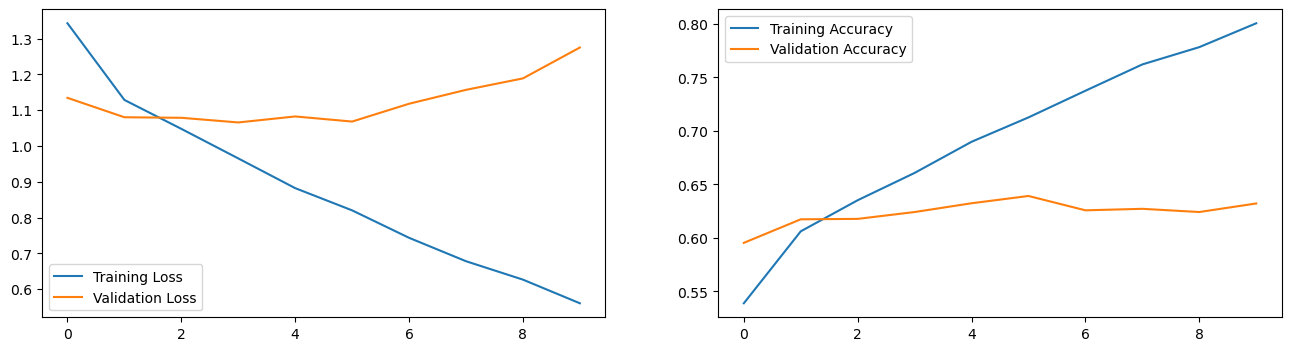

In [61]:
plot_history(history1_3)

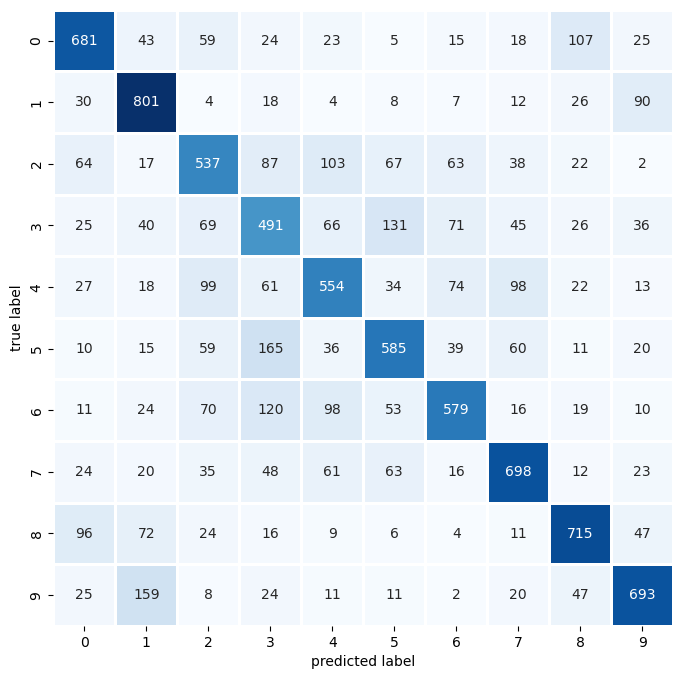

In [62]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred1_3)

ResNet50

In [92]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load pre-trained ResNet50 model (without top classification layer)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom classification head
model1_4 = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

In [93]:
model1_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
start_time = time.time()
history1_4 = model1_4.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.1)
end_time = time.time()
second_elapsed_1_4 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_1_4}s')

Epoch 1/10
1140/1140 [==============================] - 586s 507ms/step - loss: 2.0782 - accuracy: 0.2408 - val_loss: 1.9497 - val_accuracy: 0.2916
Epoch 2/10
1140/1140 [==============================] - 272s 239ms/step - loss: 1.9058 - accuracy: 0.3026 - val_loss: 1.8714 - val_accuracy: 0.3049
Epoch 3/10
1140/1140 [==============================] - 266s 233ms/step - loss: 1.8575 - accuracy: 0.3207 - val_loss: 1.8457 - val_accuracy: 0.3267
Epoch 4/10
1140/1140 [==============================] - 274s 241ms/step - loss: 1.8173 - accuracy: 0.3402 - val_loss: 1.8633 - val_accuracy: 0.3133
Epoch 5/10
1140/1140 [==============================] - 270s 237ms/step - loss: 1.7858 - accuracy: 0.3498 - val_loss: 1.7870 - val_accuracy: 0.3499
Epoch 6/10
1140/1140 [==============================] - 250s 219ms/step - loss: 1.7703 - accuracy: 0.3602 - val_loss: 1.8286 - val_accuracy: 0.3304
Epoch 7/10
1140/1140 [==============================] - 261s 229ms/step - loss: 1.7576 - accuracy: 0.3647 - val_

In [96]:
test_loss1_4, test_acc1_4 = model1_4.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc1_4}, Test loss: {test_loss1_4}")

313/313 - 66s - loss: 1.7047 - accuracy: 0.3839 - 66s/epoch - 209ms/step
Test accuracy: 0.383899986743927, Test loss: 1.704745888710022


In [97]:
pred1_4= model1_4.predict(test_images)
pred1_4=np.argmax(pred1_4, axis=1)

313/313 [==============================] - 70s 215ms/step


In [98]:
print_validation_report(np.argmax(test_labels, axis=1), pred1_4)

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      1000
           1       0.45      0.41      0.43      1000
           2       0.38      0.09      0.15      1000
           3       0.27      0.02      0.04      1000
           4       0.30      0.45      0.36      1000
           5       0.39      0.35      0.37      1000
           6       0.32      0.54      0.40      1000
           7       0.31      0.64      0.42      1000
           8       0.50      0.53      0.52      1000
           9       0.50      0.45      0.47      1000

    accuracy                           0.38     10000
   macro avg       0.39      0.38      0.36     10000
weighted avg       0.39      0.38      0.36     10000

Accuracy Score: 0.3839
Root Mean Square Error: 3.3304504199882636


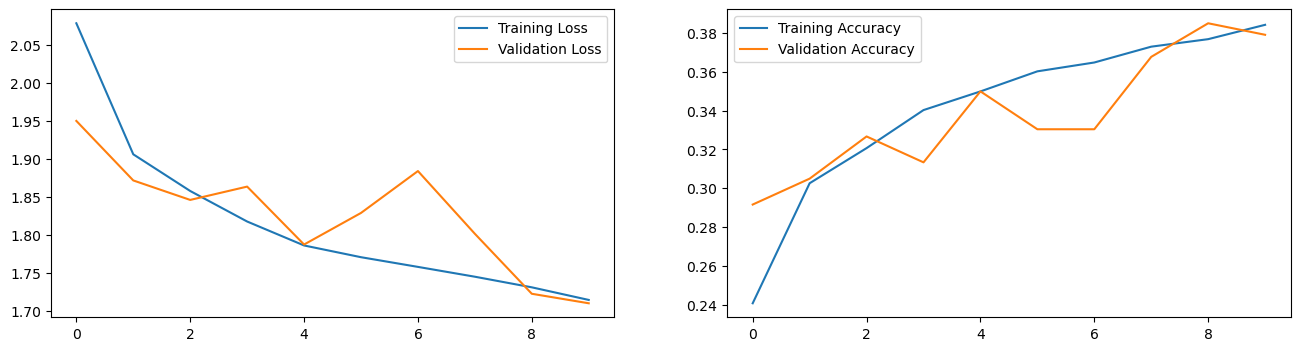

In [99]:
plot_history(history1_4)

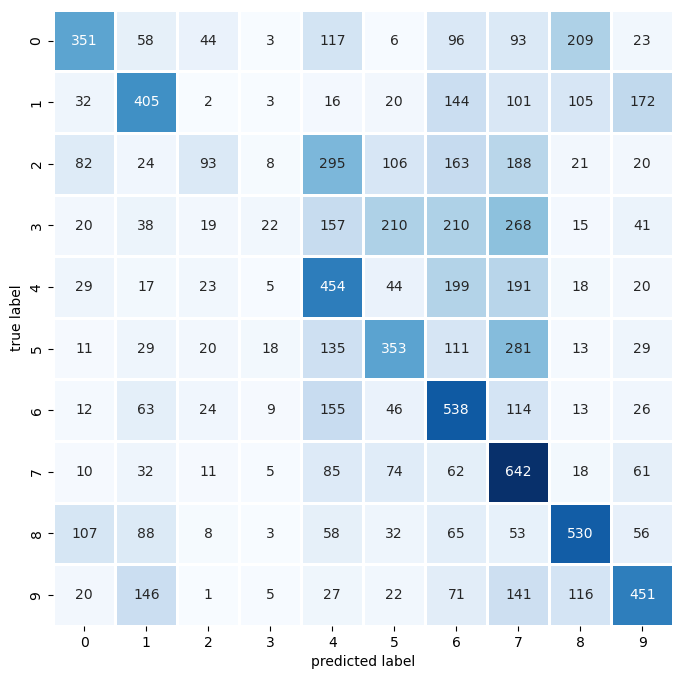

In [100]:
plot_confusion_matrix(np.argmax(test_labels, axis=1), pred1_4)

Cats vs Dogs Redux: Kernel Edition

Since this is a Kaggle dataset, the test set is not labeled, so we will need to split the training dataset

In [136]:
#Preprocessing

import zipfile
import os

# Path to the zip file in your Jupyter notebook environment
train_file_path = "C:/Users/ianre/Downloads/train.zip"

In [137]:
extract_dir_train = 'train'

# Extract the zip file
with zipfile.ZipFile(train_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir_train)

In [139]:
train_path, train_dirs, train_files = next(os.walk('train/train'))
print('Number of images in train is :',len(train_files))

Number of images in train is : 25000


In [144]:
categories=[]
for img in train_files :
    category=img.split('.')[0]
    if category=='dog':
        categories.append('dog')
    else :
        categories.append('cat')
        
df=pd.DataFrame({'Image':train_files,'Category':categories})

df

Image Category
0         cat.0.jpg      cat
1         cat.1.jpg      cat
2        cat.10.jpg      cat
3       cat.100.jpg      cat
4      cat.1000.jpg      cat
...             ...      ...
24995  dog.9995.jpg      dog
24996  dog.9996.jpg      dog
24997  dog.9997.jpg      dog
24998  dog.9998.jpg      dog
24999  dog.9999.jpg      dog

[25000 rows x 2 columns]

In [154]:
#Shuffle images so they can be split into train test better
df = df.sample(frac=1)

df

Image Category
7589   cat.5579.jpg      cat
20418  dog.5875.jpg      dog
19216  dog.4793.jpg      dog
19514  dog.5060.jpg      dog
4385   cat.2695.jpg      cat
...             ...      ...
18583  dog.4222.jpg      dog
10539  cat.8233.jpg      cat
7089   cat.5128.jpg      cat
22701   dog.793.jpg      dog
4665   cat.2947.jpg      cat

[25000 rows x 2 columns]

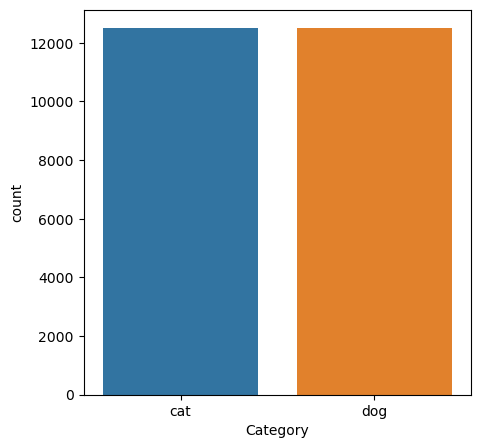

In [155]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Category');

In [148]:
train_files[1]

'cat.1.jpg'

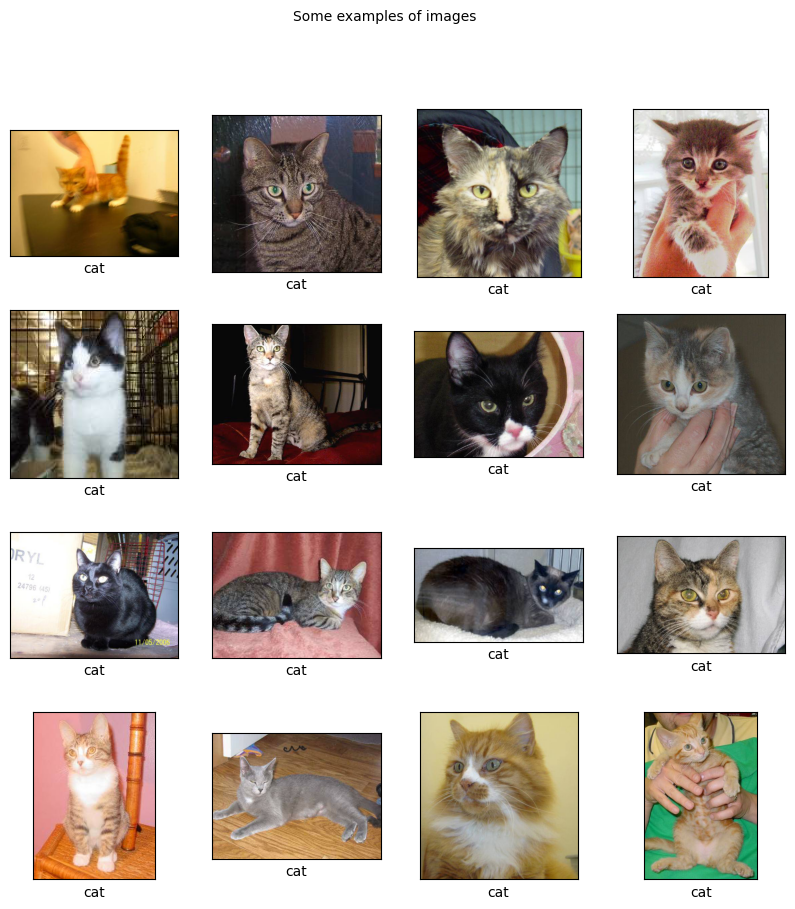

In [156]:
#Unshuffled data, which is why the first 16 are all cats

fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images", fontsize=10)
for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(plt.imread('train/train/'+train_files[i]))
        plt.xlabel(categories[i])
plt.show()


In [157]:
train, test =train_test_split(df,test_size=0.2,random_state=42)
train.head()

Image Category
19928  dog.5433.jpg      dog
4327   cat.2642.jpg      cat
22346   dog.761.jpg      dog
10487  cat.8187.jpg      cat
24858  dog.9871.jpg      dog

In [158]:
train = train.reset_index(drop=True)
test  = test.reset_index(drop=True)
train.head()

Image Category
0  dog.5433.jpg      dog
1  cat.2642.jpg      cat
2   dog.761.jpg      dog
3  cat.8187.jpg      cat
4  dog.9871.jpg      dog

In [159]:
test.head()

Image Category
0   cat.4680.jpg      cat
1   dog.9437.jpg      dog
2   dog.1567.jpg      dog
3  dog.10664.jpg      dog
4   dog.5219.jpg      dog

In [166]:
train, val =train_test_split(train,test_size=0.1,random_state=42)
train = train.reset_index(drop=True)
val  = val.reset_index(drop=True)
val.head()

Image Category
0   dog.2297.jpg      dog
1   cat.4530.jpg      cat
2    cat.747.jpg      cat
3  dog.11624.jpg      dog
4   dog.1637.jpg      dog

In [167]:
train_datagen = ImageDataGenerator(
    
    rescale=1.0/255,                                     # Rescale pixel values to [0, 1]
    rotation_range=20,                                   # Random rotation within 20 degrees
    width_shift_range=0.2,                               # Random horizontal shift by 20% of image width
    height_shift_range=0.2,                              # Random vertical shift by 20% of image height
    horizontal_flip=True,                                # Random horizontal flipping
    fill_mode='nearest'                                  # Fill mode for new pixels after shifts/rotations
)


train_generator = train_datagen.flow_from_dataframe(
                                            
     train,                                              # dataframe
     directory="train/train",    
     x_col='Image',
     y_col='Category',
     target_size=(224, 224),                             # Resize images to this size
     batch_size=32,                                      # Number of images in each batch
     seed=42,                                            # Optional: Set a random seed for shuffling
     class_mode='categorical',                           # Mode for class labels (categorical for one-hot encoding)
) 

Found 18000 validated image filenames belonging to 2 classes.


In [168]:
val_datagen  = ImageDataGenerator(rescale = 1.0/255.)    # Rescale pixel values to [0, 1]

val_generator = val_datagen.flow_from_dataframe(
    
     val,
     directory="train/train",
     x_col='Image',
     y_col='Category',
     target_size = (224, 224),
     batch_size=32,
     class_mode  = 'categorical',
     shuffle = False                      #shuffle=False to keep the order of image labels matching the generator & 
                                                                         #get good results in Confusion_Matrix  
)

Found 2000 validated image filenames belonging to 2 classes.


In [170]:
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)    # Rescale pixel values to [0, 1]

test_generator = test_datagen.flow_from_dataframe(
    
     test,
     directory="train/train",
     x_col='Image',
     y_col='Category',
     target_size = (224, 224),
     batch_size=32,
     class_mode  = 'categorical',
     shuffle = False                      #shuffle=False to keep the order of image labels matching the generator & 
                                                                         #get good results in Confusion_Matrix  
)

Found 5000 validated image filenames belonging to 2 classes.


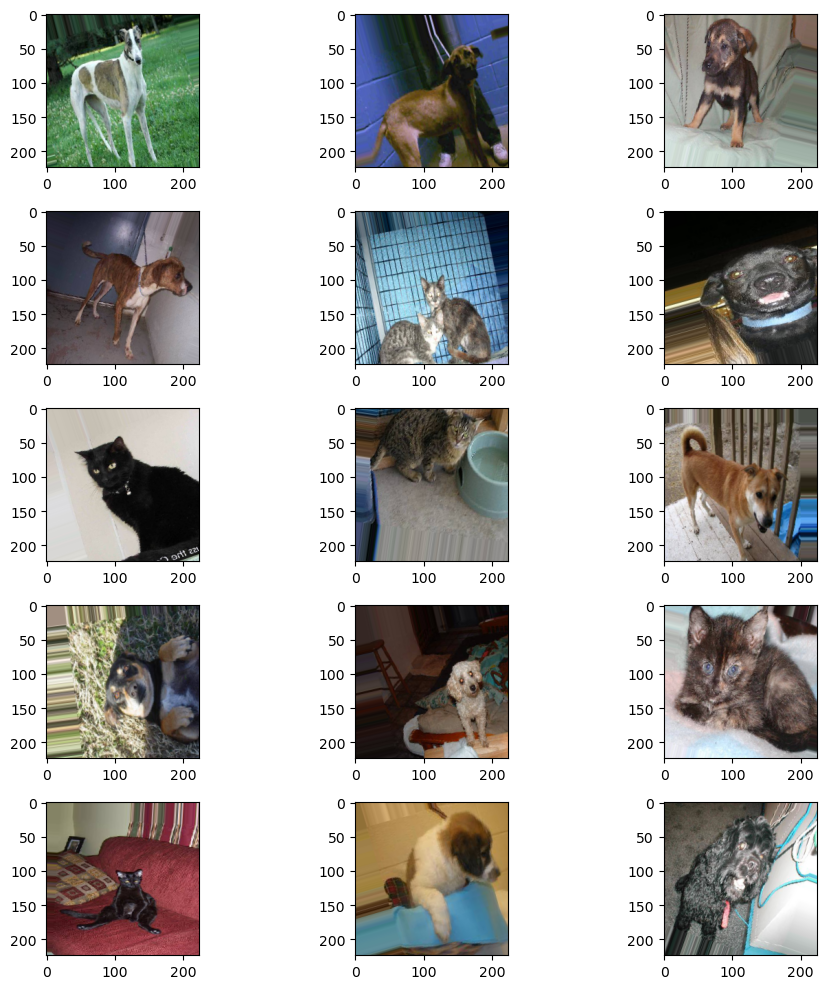

In [162]:
# show augmentation

plt.figure(figsize=(10, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for img, label in train_generator:
        image = img[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

LeNet5

In [213]:
input_shape = (224, 224, 3)
num_classes = 2
model2_1 = build_lenet5(input_shape, num_classes)

In [214]:
model2_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [215]:
start_time = time.time()
history2_1 = model2_1.fit(train_generator, steps_per_epoch = 100, epochs=10, 
                    validation_data=val_generator, validation_steps = 50, verbose=1)
end_time = time.time()
second_elapsed_2_1 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_2_1}s')

Epoch 1/10
100/100 [==============================] - 162s 2s/step - loss: 2.0760 - accuracy: 0.5016 - val_loss: 1.0860 - val_accuracy: 0.4950
Epoch 2/10
100/100 [==============================] - 155s 2s/step - loss: 0.7515 - accuracy: 0.5106 - val_loss: 0.6934 - val_accuracy: 0.5050
Epoch 3/10
100/100 [==============================] - 102s 1s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6954 - val_accuracy: 0.4950
Epoch 4/10
100/100 [==============================] - 103s 1s/step - loss: 0.6938 - accuracy: 0.5094 - val_loss: 0.6945 - val_accuracy: 0.5050
Epoch 5/10
100/100 [==============================] - 101s 1s/step - loss: 0.6941 - accuracy: 0.5013 - val_loss: 0.6944 - val_accuracy: 0.5050
Epoch 6/10
100/100 [==============================] - 102s 1s/step - loss: 0.6943 - accuracy: 0.5016 - val_loss: 0.6939 - val_accuracy: 0.4950
Epoch 7/10
100/100 [==============================] - 97s 972ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6961 - val_accuracy: 0.49

In [216]:
test_loss2_1, test_acc2_1 = model2_1.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc2_1}, Test loss: {test_loss2_1}")

157/157 - 52s - loss: 0.6937 - accuracy: 0.4936 - 52s/epoch - 332ms/step
Test accuracy: 0.4936000108718872, Test loss: 0.6936771273612976


In [217]:
pred2_1= model2_1.predict(test_generator)
pred2_1=np.argmax(pred2_1, axis=1)

true_labels = test_generator.classes

labels =['cat','dog']

print(classification_report(true_labels,pred2_1,target_names=labels))

157/157 [==============================] - 44s 278ms/step
              precision    recall  f1-score   support

         cat       0.49      1.00      0.66      2468
         dog       0.00      0.00      0.00      2532

    accuracy                           0.49      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.24      0.49      0.33      5000



C:\Users\ianre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ianre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ianre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


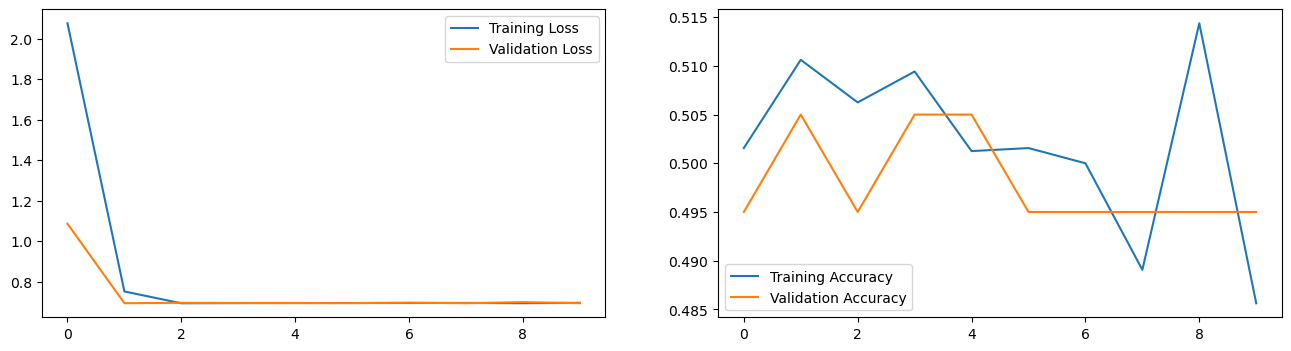

In [218]:
plot_history(history2_1)

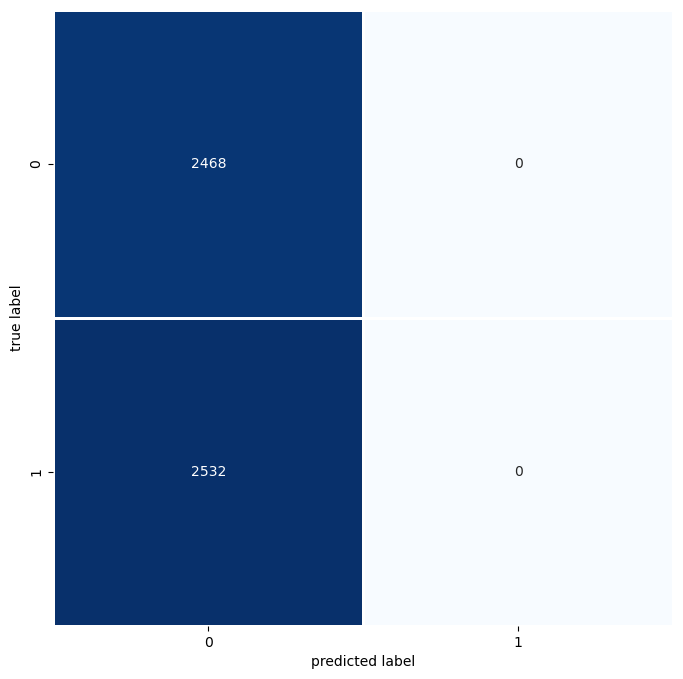

In [219]:
plot_confusion_matrix(true_labels, pred2_1)

Perfectly classifies everything as belonin to one class. At first it was dog, but this time it is cat.

VGG16

In [223]:
# Load pre-trained VGG16 model (without top classification layer)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification head
model2_2 = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # 2 classses for Dogs vs Cats
])

In [224]:
model2_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [225]:
start_time = time.time()
history2_2 = model2_2.fit(train_generator, steps_per_epoch = 100, epochs=10, 
                    validation_data=val_generator, validation_steps = 50, verbose=1)
end_time = time.time()
second_elapsed_2_2 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_2_2}s')

Epoch 1/10
100/100 [==============================] - 1204s 12s/step - loss: 0.6017 - accuracy: 0.8131 - val_loss: 0.2626 - val_accuracy: 0.8869
Epoch 2/10
100/100 [==============================] - 1189s 12s/step - loss: 0.3092 - accuracy: 0.8747 - val_loss: 0.2972 - val_accuracy: 0.8831
Epoch 3/10
100/100 [==============================] - 1182s 12s/step - loss: 0.2781 - accuracy: 0.8797 - val_loss: 0.2249 - val_accuracy: 0.9125
Epoch 4/10
100/100 [==============================] - 1020s 10s/step - loss: 0.3154 - accuracy: 0.8675 - val_loss: 0.2094 - val_accuracy: 0.9112
Epoch 5/10
100/100 [==============================] - 818s 8s/step - loss: 0.2435 - accuracy: 0.8956 - val_loss: 0.2284 - val_accuracy: 0.9106
Epoch 6/10
100/100 [==============================] - 840s 8s/step - loss: 0.2288 - accuracy: 0.9084 - val_loss: 0.2070 - val_accuracy: 0.9137
Epoch 7/10
100/100 [==============================] - 819s 8s/step - loss: 0.2304 - accuracy: 0.9013 - val_loss: 0.1987 - val_accuracy

In [242]:
test_loss2_2, test_acc2_2 = model2_2.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc2_2}, Test loss: {test_loss2_2}")

157/157 - 818s - loss: 0.1740 - accuracy: 0.9294 - 818s/epoch - 5s/step
Test accuracy: 0.9294000267982483, Test loss: 0.17396926879882812


In [244]:
pred2_2= model2_2.predict(test_generator)
pred2_2=np.argmax(pred2_2, axis=1)

true_labels = test_generator.classes

labels =['cat','dog']

print(classification_report(true_labels,pred2_2,target_names=labels))

157/157 [==============================] - 1241s 8s/step
              precision    recall  f1-score   support

         cat       0.95      0.90      0.93      2468
         dog       0.91      0.96      0.93      2532

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



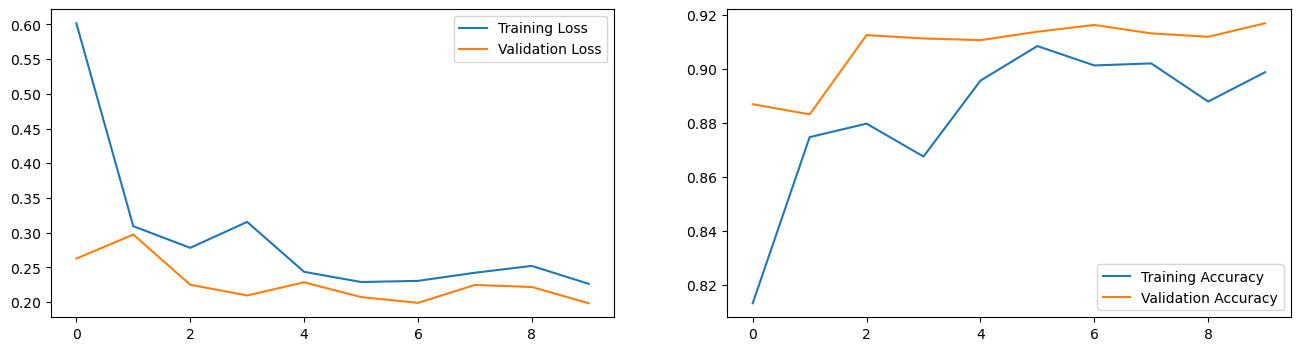

In [245]:
plot_history(history2_2)

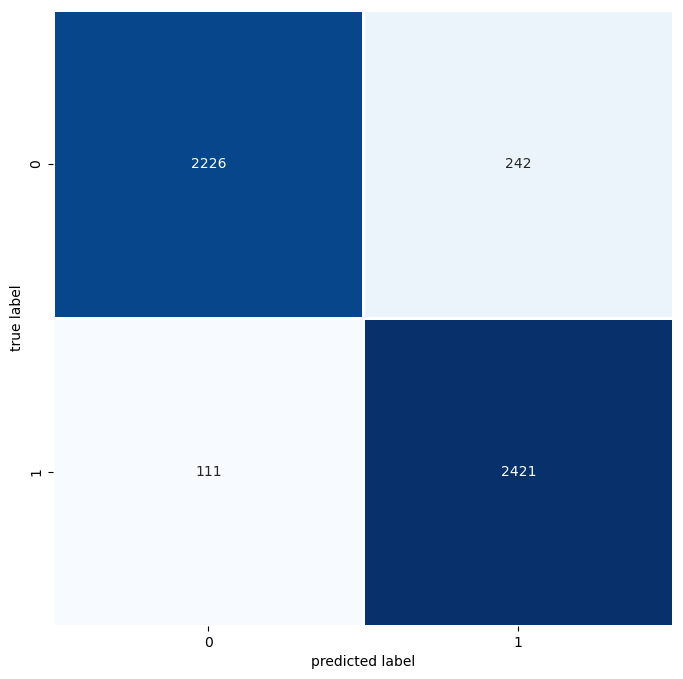

In [246]:
plot_confusion_matrix(true_labels, pred2_2)

InceptionV3

In [227]:
input_shape = (224, 224, 3)
num_classes = 2
model2_3 = build_inceptionv3(input_shape, num_classes)

In [228]:
model2_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [229]:
start_time = time.time()
history2_3 = model2_3.fit(train_generator, steps_per_epoch = 100, epochs=10, 
                    validation_data=val_generator, validation_steps = 50, verbose=1)
end_time = time.time()
second_elapsed_2_3 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_2_3}s')

Epoch 1/10
100/100 [==============================] - 183s 2s/step - loss: 0.1778 - accuracy: 0.9547 - val_loss: 0.0457 - val_accuracy: 0.9837
Epoch 2/10
100/100 [==============================] - 185s 2s/step - loss: 0.1232 - accuracy: 0.9625 - val_loss: 0.0838 - val_accuracy: 0.9756
Epoch 3/10
100/100 [==============================] - 182s 2s/step - loss: 0.0940 - accuracy: 0.9663 - val_loss: 0.0564 - val_accuracy: 0.9794
Epoch 4/10
100/100 [==============================] - 187s 2s/step - loss: 0.0721 - accuracy: 0.9753 - val_loss: 0.0384 - val_accuracy: 0.9869
Epoch 5/10
100/100 [==============================] - 172s 2s/step - loss: 0.0851 - accuracy: 0.9722 - val_loss: 0.0386 - val_accuracy: 0.9875
Epoch 6/10
100/100 [==============================] - 183s 2s/step - loss: 0.0696 - accuracy: 0.9716 - val_loss: 0.0397 - val_accuracy: 0.9856
Epoch 7/10
100/100 [==============================] - 179s 2s/step - loss: 0.0611 - accuracy: 0.9784 - val_loss: 0.0392 - val_accuracy: 0.9856

In [238]:
test_loss2_3, test_acc2_3 = model2_3.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc2_3}, Test loss: {test_loss2_3}")

157/157 - 156s - loss: 0.0451 - accuracy: 0.9808 - 156s/epoch - 992ms/step
Test accuracy: 0.9807999730110168, Test loss: 0.045138075947761536


In [239]:
pred2_3= model2_3.predict(test_generator)
pred2_3=np.argmax(pred2_3, axis=1)

true_labels = test_generator.classes

labels =['cat','dog']

print(classification_report(true_labels,pred2_3,target_names=labels))

157/157 [==============================] - 159s 997ms/step
              precision    recall  f1-score   support

         cat       1.00      0.96      0.98      2468
         dog       0.97      1.00      0.98      2532

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



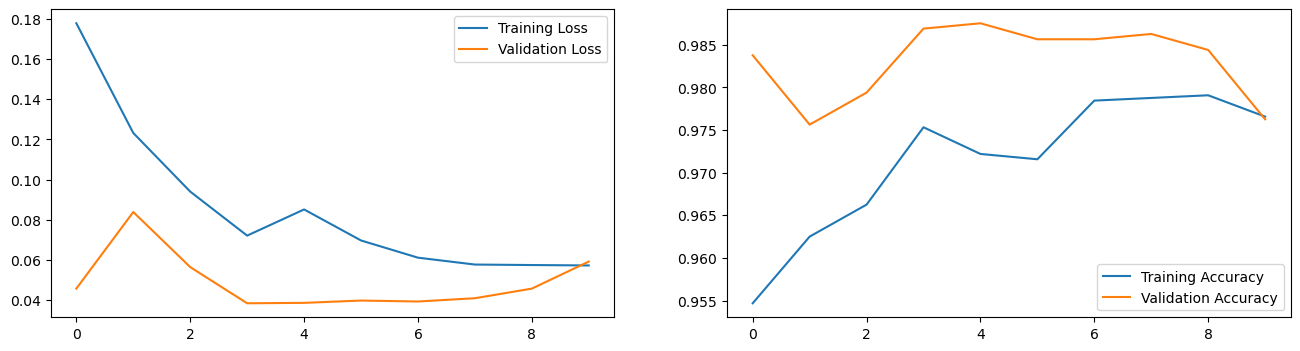

In [240]:
plot_history(history2_3)

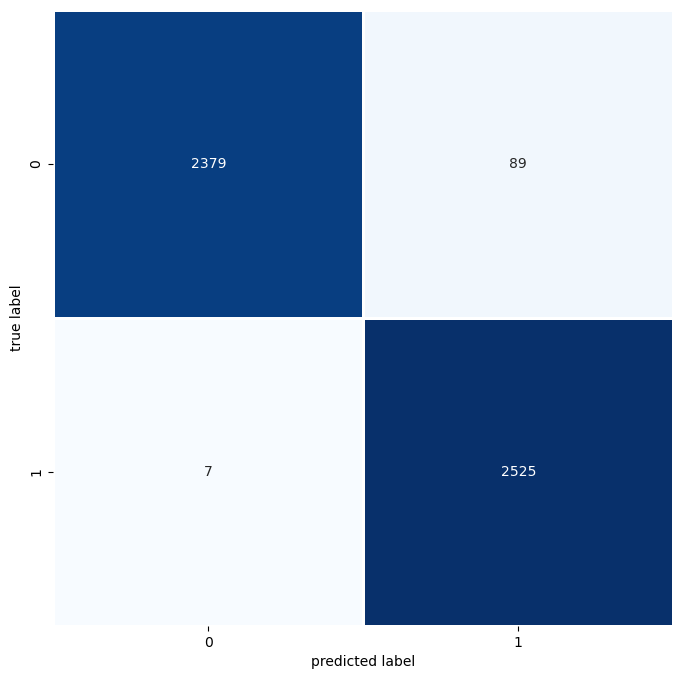

In [241]:
plot_confusion_matrix(true_labels, pred2_3)

ResNet50

In [230]:
# Load pre-trained ResNet50 model (without top classification layer)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom classification head
model2_4 = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes for Dogs vs cats
])

In [231]:
model2_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [232]:
start_time = time.time()
history2_4 = model2_4.fit(train_generator, steps_per_epoch = 100, epochs=10, 
                    validation_data=val_generator, validation_steps = 50, verbose=1)
end_time = time.time()
second_elapsed_2_4 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_2_4}s')

Epoch 1/10
100/100 [==============================] - 353s 3s/step - loss: 1.8141 - accuracy: 0.5366 - val_loss: 0.8962 - val_accuracy: 0.6200
Epoch 2/10
100/100 [==============================] - 380s 4s/step - loss: 1.0599 - accuracy: 0.5803 - val_loss: 0.6338 - val_accuracy: 0.6581
Epoch 3/10
100/100 [==============================] - 417s 4s/step - loss: 0.7950 - accuracy: 0.6140 - val_loss: 0.8257 - val_accuracy: 0.6644
Epoch 4/10
100/100 [==============================] - 459s 5s/step - loss: 0.8996 - accuracy: 0.5863 - val_loss: 0.7183 - val_accuracy: 0.6819
Epoch 5/10
100/100 [==============================] - 478s 5s/step - loss: 0.8278 - accuracy: 0.6116 - val_loss: 0.6228 - val_accuracy: 0.6800
Epoch 6/10
100/100 [==============================] - 565s 6s/step - loss: 0.7518 - accuracy: 0.6266 - val_loss: 0.9163 - val_accuracy: 0.5531
Epoch 7/10
100/100 [==============================] - 500s 5s/step - loss: 0.8322 - accuracy: 0.6112 - val_loss: 0.7190 - val_accuracy: 0.5794

In [237]:
print(f'Finished model training in {second_elapsed_2_4}s')

Finished model training in 4707s


In [233]:
test_loss2_4, test_acc2_4 = model2_4.evaluate(test_generator, verbose=2)
print(f"Test accuracy: {test_acc2_4}, Test loss: {test_loss2_4}")

157/157 - 313s - loss: 0.7612 - accuracy: 0.6708 - 313s/epoch - 2s/step
Test accuracy: 0.670799970626831, Test loss: 0.7611652612686157


In [234]:
pred2_4= model2_4.predict(test_generator)
pred2_4=np.argmax(pred2_4, axis=1)

true_labels = test_generator.classes

labels =['cat','dog']

print(classification_report(true_labels,pred2_4,target_names=labels))

157/157 [==============================] - 315s 2s/step
              precision    recall  f1-score   support

         cat       0.78      0.46      0.58      2468
         dog       0.63      0.87      0.73      2532

    accuracy                           0.67      5000
   macro avg       0.70      0.67      0.65      5000
weighted avg       0.70      0.67      0.66      5000



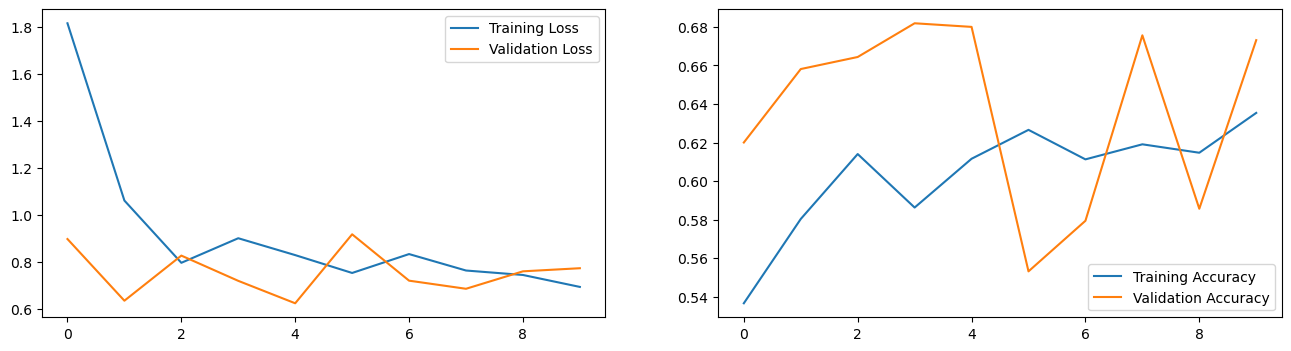

In [235]:
plot_history(history2_4)

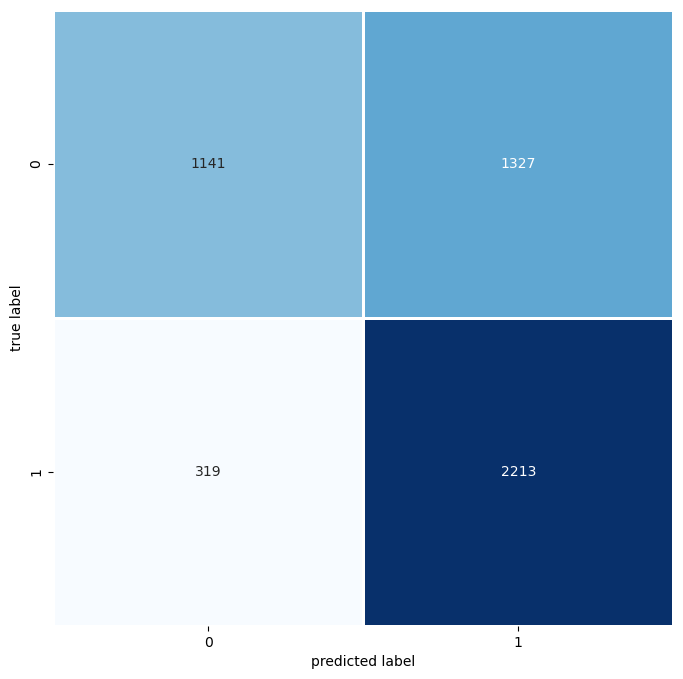

In [236]:
plot_confusion_matrix(true_labels, pred2_4)

EuroSat Land Use data

Preprocessing

In [256]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the EuroSAT dataset
ds, ds_info = tfds.load(
    'eurosat/rgb',
    split='train',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Print dataset information
print(ds_info)

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='C:\\Users\\ianre\\tensorflow_datasets\\eurosat\\rgb\\2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),

In [257]:
# Calculate the sizes
total_size = ds_info.splits['train'].num_examples
val_size = int(0.08 * total_size)                       #10% of the 80% of data that goes into the train set
test_size = int(0.2 * total_size)
train_size = total_size - val_size - test_size

# Shuffle and split the dataset
ds = ds.shuffle(buffer_size=total_size, reshuffle_each_iteration=False)
ds_train = ds.skip(val_size + test_size)
ds_val = ds.skip(test_size).take(val_size)
ds_test = ds.take(test_size)

In [258]:
# Define a function to normalize the images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Batch size
batch_size = 32

# Prepare the training dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(train_size)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Prepare the validation dataset
ds_val = ds_val.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_val = ds_val.batch(batch_size)
ds_val = ds_val.cache()
ds_val = ds_val.prefetch(tf.data.AUTOTUNE)

# Prepare the test dataset
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [260]:
ds_info.features['label'].num_classes

10

In [262]:
ds_info.features['label'].names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

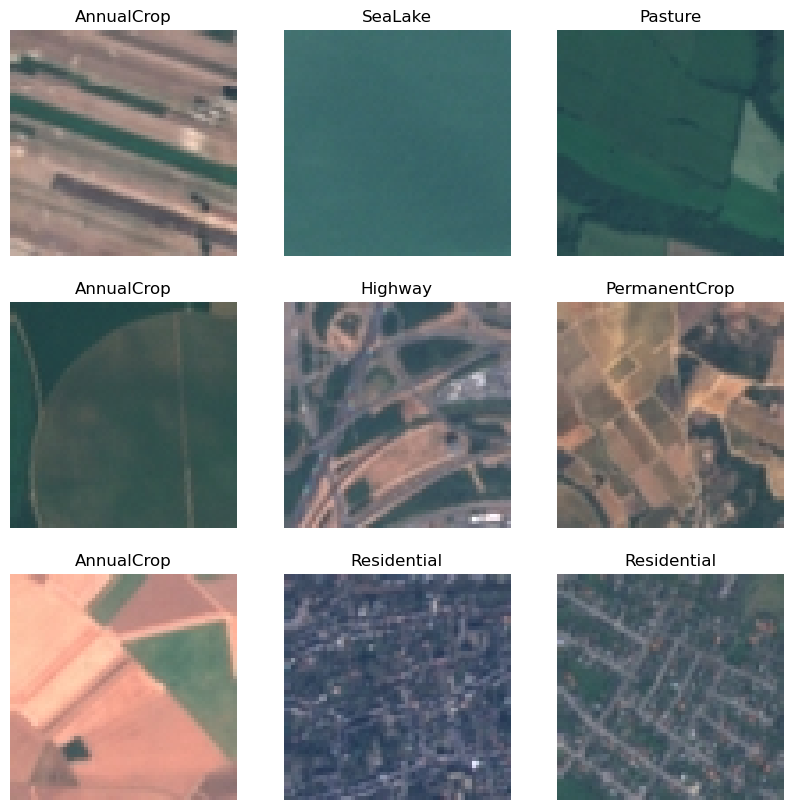

In [264]:
# Take one batch of 9 images and labels
images, labels = next(iter(ds_train))

# Define the label names
label_names = ds_info.features['label'].names

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    plt.title(label_names[labels[i].numpy()])
    plt.axis('off')
plt.show()

LeNet5

In [277]:
# Instantiate the model
input_shape = (64, 64, 3)
num_classes = 10
model3_1 = build_lenet5(input_shape, num_classes)

In [278]:
model3_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [279]:
start_time = time.time()
history3_1 = model3_1.fit(ds_train, epochs=10, 
                    validation_data=ds_val)
end_time = time.time()
second_elapsed_3_1 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_3_1}s')

Epoch 1/10
608/608 [==============================] - 34s 50ms/step - loss: 1.6017 - accuracy: 0.4086 - val_loss: 1.3712 - val_accuracy: 0.5144
Epoch 2/10
608/608 [==============================] - 29s 48ms/step - loss: 1.3321 - accuracy: 0.5265 - val_loss: 1.3006 - val_accuracy: 0.5407
Epoch 3/10
608/608 [==============================] - 29s 48ms/step - loss: 1.2484 - accuracy: 0.5583 - val_loss: 1.2036 - val_accuracy: 0.5694
Epoch 4/10
608/608 [==============================] - 29s 47ms/step - loss: 1.1931 - accuracy: 0.5777 - val_loss: 1.3801 - val_accuracy: 0.4944
Epoch 5/10
608/608 [==============================] - 29s 48ms/step - loss: 1.2209 - accuracy: 0.5639 - val_loss: 1.2311 - val_accuracy: 0.5477
Epoch 6/10
608/608 [==============================] - 29s 48ms/step - loss: 1.2327 - accuracy: 0.5587 - val_loss: 1.3978 - val_accuracy: 0.4847
Epoch 7/10
608/608 [==============================] - 29s 48ms/step - loss: 1.2055 - accuracy: 0.5661 - val_loss: 1.1723 - val_accuracy:

In [280]:
test_loss3_1, test_acc3_1 = model3_1.evaluate(ds_test, verbose=2)
print(f"Test accuracy: {test_acc3_1}, Test loss: {test_loss3_1}")

169/169 - 3s - loss: 1.4571 - accuracy: 0.4802 - 3s/epoch - 19ms/step
Test accuracy: 0.4801851809024811, Test loss: 1.4570890665054321


In [281]:
pred3_1= model3_1.predict(ds_test)
pred3_1=np.argmax(pred3_1, axis=1)

169/169 [==============================] - 3s 19ms/step


In [265]:
label_names = ds_info.features['label'].names

In [266]:
print(label_names)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [267]:
# Extract true labels from the test dataset
true_labels = []
for _, label in ds_test.unbatch():
    true_labels.append(label.numpy())
true_labels = tf.constant(true_labels)

In [268]:
true_labels

<tf.Tensor: shape=(5400,), dtype=int32, numpy=array([9, 8, 9, ..., 3, 7, 3])>

In [284]:
print_validation_report(true_labels,pred3_1)

Classification Report
              precision    recall  f1-score   support

           0       0.33      0.82      0.47       583
           1       0.89      0.50      0.64       613
           2       0.45      0.22      0.30       596
           3       0.31      0.12      0.18       499
           4       0.53      0.89      0.66       503
           5       0.44      0.51      0.47       383
           6       0.32      0.31      0.32       519
           7       0.42      0.28      0.33       600
           8       0.63      0.46      0.53       507
           9       0.72      0.69      0.71       597

    accuracy                           0.48      5400
   macro avg       0.50      0.48      0.46      5400
weighted avg       0.51      0.48      0.46      5400

Accuracy Score: 0.48018518518518516
Root Mean Square Error: 3.333055543980517


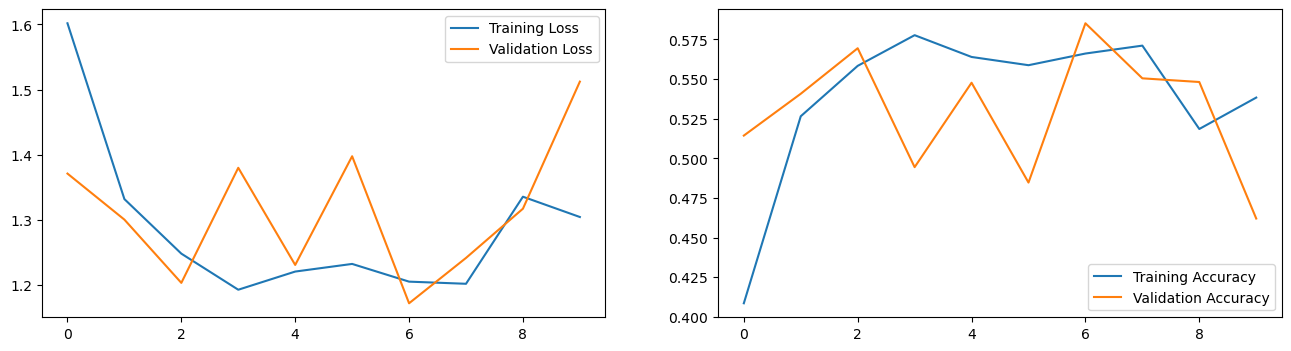

In [285]:
plot_history(history3_1)

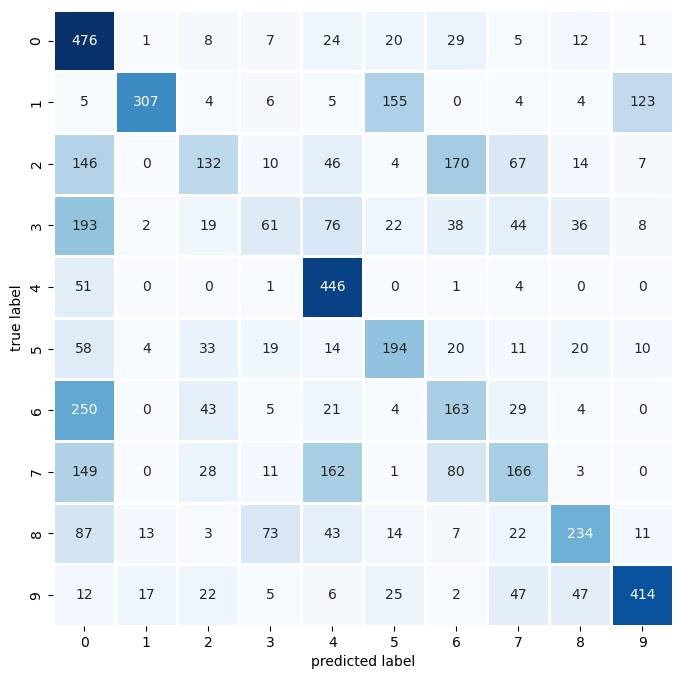

In [287]:
plot_confusion_matrix(true_labels, pred3_1)

VGG16

In [288]:
# Load pre-trained VGG16 model (without top classification layer)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification head
model3_2 = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for Cifar-10
])

In [289]:
model3_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [290]:
start_time = time.time()
history3_2 = model3_2.fit(ds_train, epochs=10, 
                    validation_data=ds_val)
end_time = time.time()
second_elapsed_3_2 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_3_2}s')

Epoch 1/10
608/608 [==============================] - 507s 829ms/step - loss: 0.6296 - accuracy: 0.7820 - val_loss: 0.5178 - val_accuracy: 0.8190
Epoch 2/10
608/608 [==============================] - 494s 812ms/step - loss: 0.4216 - accuracy: 0.8506 - val_loss: 0.4398 - val_accuracy: 0.8560
Epoch 3/10
608/608 [==============================] - 500s 823ms/step - loss: 0.3571 - accuracy: 0.8751 - val_loss: 0.4172 - val_accuracy: 0.8625
Epoch 4/10
608/608 [==============================] - 756s 1s/step - loss: 0.3199 - accuracy: 0.8874 - val_loss: 0.4395 - val_accuracy: 0.8611
Epoch 5/10
608/608 [==============================] - 443s 728ms/step - loss: 0.2914 - accuracy: 0.8956 - val_loss: 0.4503 - val_accuracy: 0.8574
Epoch 6/10
608/608 [==============================] - 403s 663ms/step - loss: 0.2639 - accuracy: 0.9078 - val_loss: 0.4212 - val_accuracy: 0.8713
Epoch 7/10
608/608 [==============================] - 390s 641ms/step - loss: 0.2424 - accuracy: 0.9162 - val_loss: 0.4009 - va

In [291]:
test_loss3_2, test_acc3_2 = model3_2.evaluate(ds_test, verbose=2)
print(f"Test accuracy: {test_acc3_2}, Test loss: {test_loss3_2}")

169/169 - 85s - loss: 0.4044 - accuracy: 0.8774 - 85s/epoch - 500ms/step
Test accuracy: 0.877407431602478, Test loss: 0.4044475257396698


In [295]:
pred3_2= model3_2.predict(ds_test)
pred3_2=np.argmax(pred3_2, axis=1)

169/169 [==============================] - 95s 556ms/step


In [296]:
print_validation_report(true_labels,pred3_2)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       583
           1       0.94      0.91      0.92       613
           2       0.89      0.83      0.86       596
           3       0.81      0.76      0.78       499
           4       0.93      0.96      0.94       503
           5       0.68      0.93      0.79       383
           6       0.85      0.79      0.82       519
           7       0.92      0.96      0.94       600
           8       0.84      0.82      0.83       507
           9       0.96      0.95      0.95       597

    accuracy                           0.88      5400
   macro avg       0.87      0.88      0.87      5400
weighted avg       0.88      0.88      0.88      5400

Accuracy Score: 0.8774074074074074
Root Mean Square Error: 1.5420044674960502


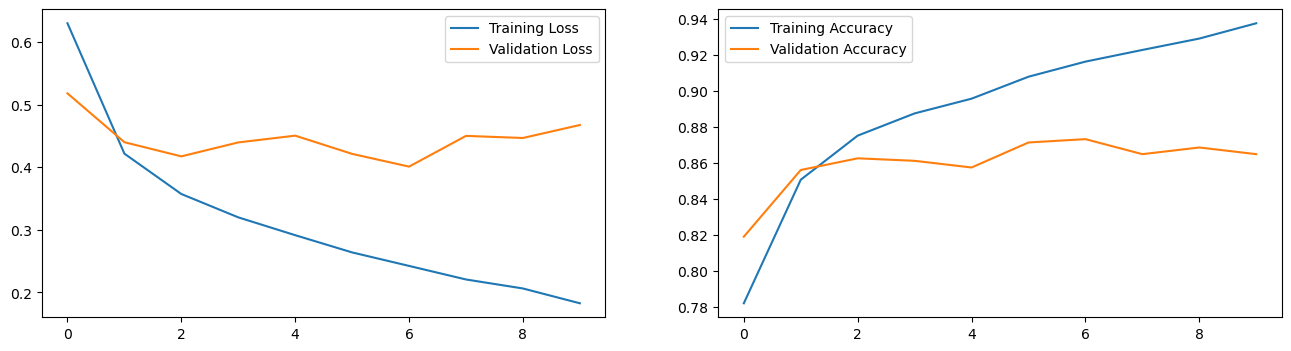

In [297]:
plot_history(history3_2)

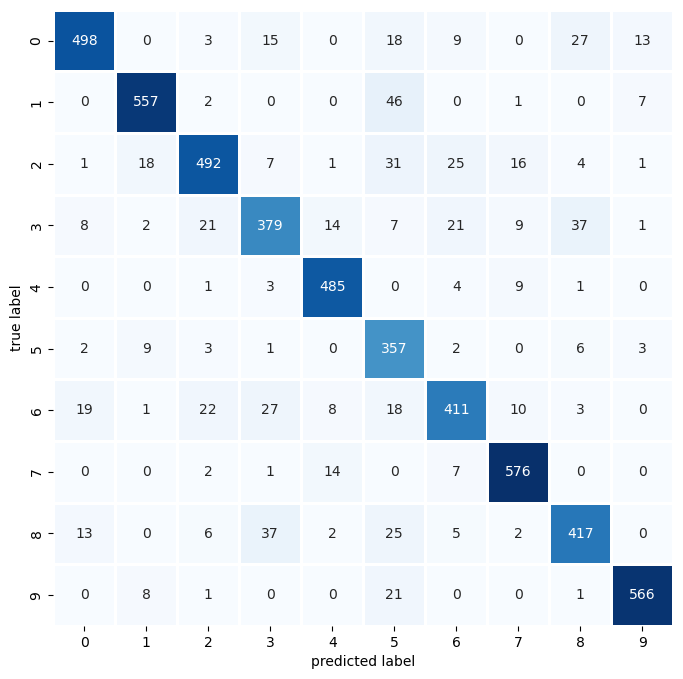

In [299]:
plot_confusion_matrix(true_labels, pred3_2)

InceptionV3

The minimum input size for IncpetionV3 is (75,75) and that is how we resized the Cifar10 dataset, so we will do the same here.

In [310]:
# Calculate the sizes
total_size = ds_info.splits['train'].num_examples
val_size = int(0.08 * total_size)                       #10% of the 80% of data that goes into the train set
test_size = int(0.2 * total_size)
train_size = total_size - val_size - test_size

# Shuffle and split the dataset
ds = ds.shuffle(buffer_size=total_size, reshuffle_each_iteration=False)
ds_train = ds.skip(val_size + test_size)
ds_val = ds.skip(test_size).take(val_size)
ds_test = ds.take(test_size)

In [311]:
# Define a function to normalize and resize the images
def preprocess_img(image, label):
    image = tf.image.resize(image, (75, 75))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Calculate the sizes
total_size = ds_info.splits['train'].num_examples
val_size = int(0.08 * total_size)
test_size = int(0.2 * total_size)
train_size = total_size - val_size - test_size

# Shuffle and split the dataset
ds = ds.shuffle(buffer_size=total_size, reshuffle_each_iteration=False)
ds_train = ds.skip(val_size + test_size)
ds_val = ds.skip(test_size).take(val_size)
ds_test = ds.take(test_size)

# Prepare the datasets
batch_size = 32
ds_train = ds_train.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)


In [312]:
true_labels = []
for _, label in ds_test.unbatch():
    true_labels.append(label.numpy())
true_labels = tf.constant(true_labels)

In [313]:
input_shape = (75, 75, 3)
num_classes = 10
model3_3 = build_inceptionv3(input_shape, num_classes)

In [314]:
model3_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [315]:
start_time = time.time()
history3_3 = model3_3.fit(ds_train, epochs=10, 
                    validation_data=ds_val)
end_time = time.time()
second_elapsed_3_3 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_3_3}s')

Epoch 1/10
608/608 [==============================] - 832s 1s/step - loss: 0.7860 - accuracy: 0.7384 - val_loss: 0.5999 - val_accuracy: 0.7968
Epoch 2/10
608/608 [==============================] - 93s 152ms/step - loss: 0.5487 - accuracy: 0.8138 - val_loss: 0.5701 - val_accuracy: 0.8065
Epoch 3/10
608/608 [==============================] - 89s 146ms/step - loss: 0.4652 - accuracy: 0.8397 - val_loss: 0.5579 - val_accuracy: 0.8139
Epoch 4/10
608/608 [==============================] - 90s 148ms/step - loss: 0.4020 - accuracy: 0.8598 - val_loss: 0.5546 - val_accuracy: 0.8227
Epoch 5/10
608/608 [==============================] - 120s 197ms/step - loss: 0.3522 - accuracy: 0.8783 - val_loss: 0.6023 - val_accuracy: 0.8162
Epoch 6/10
608/608 [==============================] - 128s 210ms/step - loss: 0.3127 - accuracy: 0.8897 - val_loss: 0.6106 - val_accuracy: 0.8199
Epoch 7/10
608/608 [==============================] - 124s 204ms/step - loss: 0.2759 - accuracy: 0.9037 - val_loss: 0.6397 - val_a

In [316]:
test_loss3_3, test_acc3_3 = model3_3.evaluate(ds_test, verbose=2)
print(f"Test accuracy: {test_acc3_3}, Test loss: {test_loss3_3}")

169/169 - 31s - loss: 0.6885 - accuracy: 0.8231 - 31s/epoch - 186ms/step
Test accuracy: 0.8231481313705444, Test loss: 0.6885433197021484


In [317]:
pred3_3= model3_3.predict(ds_test)
pred3_3=np.argmax(pred3_3, axis=1)

169/169 [==============================] - 36s 181ms/step


In [319]:
print_validation_report(true_labels,pred3_3)

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       600
           1       0.85      0.95      0.90       580
           2       0.74      0.85      0.79       585
           3       0.74      0.67      0.70       490
           4       0.81      0.93      0.87       505
           5       0.78      0.71      0.75       419
           6       0.81      0.70      0.75       463
           7       0.92      0.79      0.85       627
           8       0.74      0.81      0.77       526
           9       0.96      0.93      0.95       605

    accuracy                           0.82      5400
   macro avg       0.82      0.82      0.82      5400
weighted avg       0.83      0.82      0.82      5400

Accuracy Score: 0.8231481481481482
Root Mean Square Error: 1.8820300308541937


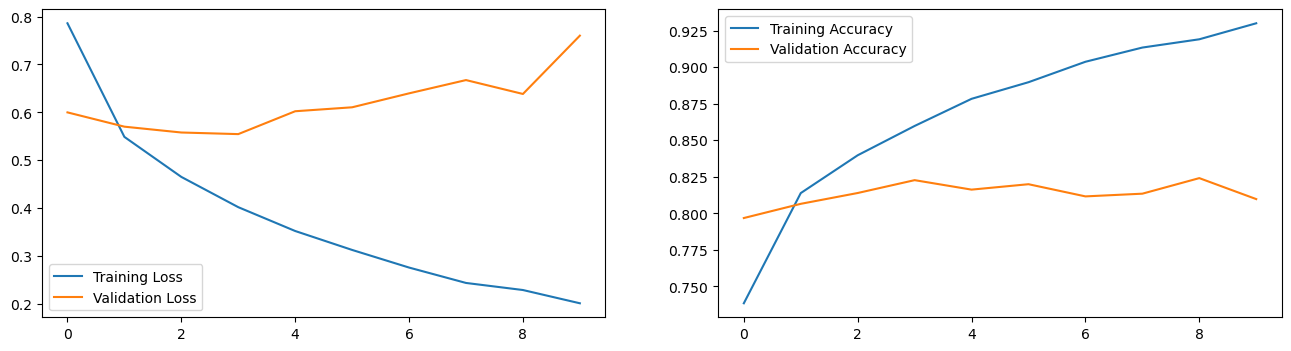

In [320]:
plot_history(history3_3)

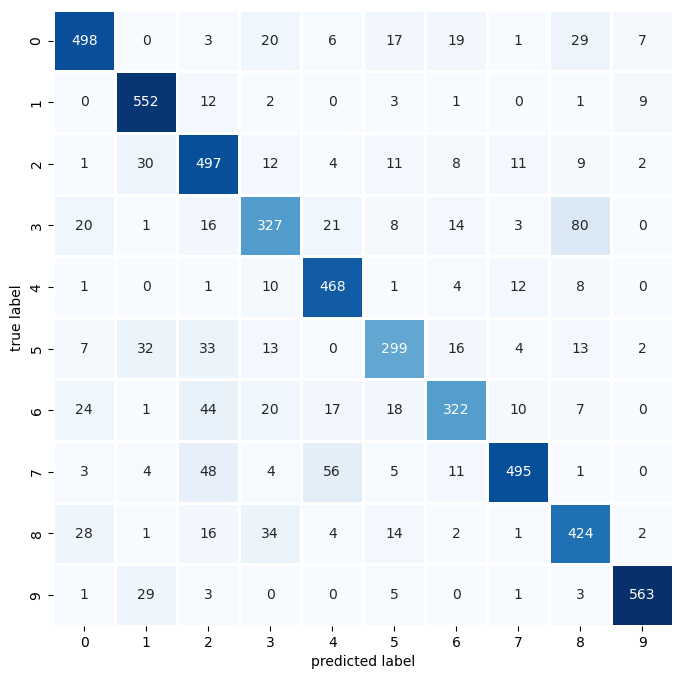

In [321]:
plot_confusion_matrix(true_labels, pred3_3)

ResNet

In [301]:
# Load pre-trained ResNet50 model (without top classification layer)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom classification head
model3_4 = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  #10 classes for eurosat
])

In [302]:
model3_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [303]:
start_time = time.time()
history3_4 = model3_4.fit(ds_train, epochs=10, 
                    validation_data=ds_val)
end_time = time.time()
second_elapsed_3_4 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_3_4}s')

Epoch 1/10
608/608 [==============================] - 243s 388ms/step - loss: 1.7558 - accuracy: 0.3496 - val_loss: 1.4943 - val_accuracy: 0.4588
Epoch 2/10
608/608 [==============================] - 227s 373ms/step - loss: 1.4544 - accuracy: 0.4546 - val_loss: 1.4384 - val_accuracy: 0.4440
Epoch 3/10
608/608 [==============================] - 255s 419ms/step - loss: 1.3802 - accuracy: 0.4908 - val_loss: 1.3341 - val_accuracy: 0.4958
Epoch 4/10
608/608 [==============================] - 241s 396ms/step - loss: 1.3132 - accuracy: 0.5199 - val_loss: 1.2723 - val_accuracy: 0.5241
Epoch 5/10
608/608 [==============================] - 234s 385ms/step - loss: 1.2917 - accuracy: 0.5272 - val_loss: 1.3177 - val_accuracy: 0.4745
Epoch 6/10
608/608 [==============================] - 228s 376ms/step - loss: 1.2622 - accuracy: 0.5337 - val_loss: 1.2611 - val_accuracy: 0.5338
Epoch 7/10
608/608 [==============================] - 246s 405ms/step - loss: 1.2309 - accuracy: 0.5474 - val_loss: 1.2943 -

In [304]:
test_loss3_4, test_acc3_4 = model3_4.evaluate(ds_test, verbose=2)
print(f"Test accuracy: {test_acc3_4}, Test loss: {test_loss3_4}")

169/169 - 67s - loss: 1.1172 - accuracy: 0.5800 - 67s/epoch - 394ms/step
Test accuracy: 0.5799999833106995, Test loss: 1.1171867847442627


In [305]:
pred3_4= model3_4.predict(ds_test)
pred3_4=np.argmax(pred3_4, axis=1)

169/169 [==============================] - 70s 400ms/step


In [307]:
print_validation_report(true_labels,pred3_4)

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       583
           1       0.89      0.54      0.67       613
           2       0.47      0.48      0.47       596
           3       0.51      0.26      0.35       499
           4       0.86      0.82      0.84       503
           5       0.35      0.36      0.36       383
           6       0.39      0.47      0.43       519
           7       0.77      0.83      0.80       600
           8       0.37      0.36      0.37       507
           9       0.61      0.91      0.73       597

    accuracy                           0.58      5400
   macro avg       0.58      0.57      0.56      5400
weighted avg       0.59      0.58      0.57      5400

Accuracy Score: 0.58
Root Mean Square Error: 3.1343674416473988


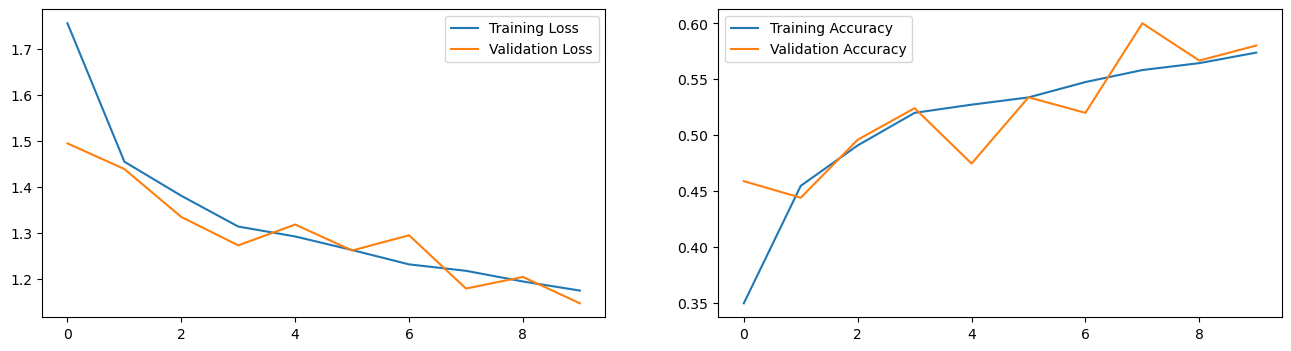

In [308]:
plot_history(history3_4)

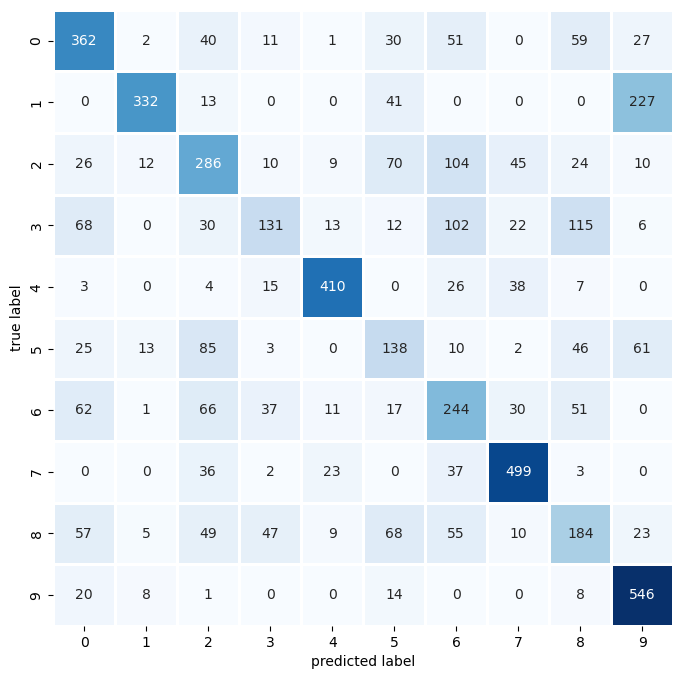

In [309]:
plot_confusion_matrix(true_labels, pred3_4)

Faces

Preprocessing

In [357]:
dataset_name = 'horses_or_humans'
(train_ds, val_ds, test_ds), ds_info = tfds.load(
    dataset_name, 
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True  # Includes labels
)

In [358]:
# Step 2: Define a function to preprocess the data
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [128, 128])  # Resize to a standard size
    image = image / 255.0  # Normalize to [0,1] range
    return image, label

# Apply the preprocessing to the datasets
train_ds = train_ds.map(preprocess).batch(32).shuffle(1000)
val_ds = val_ds.map(preprocess).batch(32)
test_ds = test_ds.map(preprocess).batch(32)

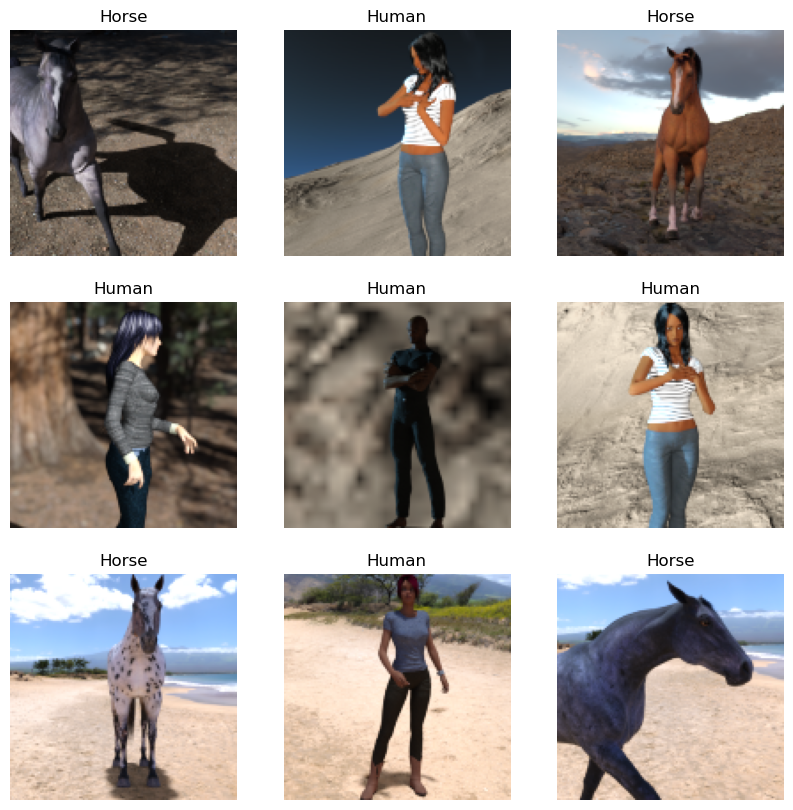

In [359]:
# Step 3: Visualize some samples from the training set
def show_sample_images(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title('Horse' if label == 0 else 'Human')
        plt.axis('off')
    plt.show()

# Show some sample images
show_sample_images(train_ds.unbatch())

In [360]:
def get_dataset_size(dataset):
    return sum(1 for _ in dataset)

# Get the sizes of the datasets
train_size = get_dataset_size(train_ds)
val_size = get_dataset_size(val_ds)
test_size = get_dataset_size(test_ds)

print(f'Training set size: {train_size}')
print(f'Validation set size: {val_size}')
print(f'Test set size: {test_size}')

Training set size: 26
Validation set size: 4
Test set size: 4


LeNet5

In [361]:
#Need to allow for 1 node and sigmoid activation function for final layer
def build_lenet5_2(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
    model.add(layers.Flatten())
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(1, 'sigmoid'))
    return model

# Instantiate the model
input_shape = (128, 128, 3) 
model4_1 = build_lenet5_2(input_shape)

In [362]:
model4_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [363]:
start_time = time.time()
history4_1 = model4_1.fit(train_ds, epochs=10, 
                    validation_data=val_ds, verbose=1)
end_time = time.time()
second_elapsed_4_1 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_4_1}s')

Epoch 1/10
26/26 [==============================] - 9s 200ms/step - loss: 4.6614 - accuracy: 0.5049 - val_loss: 3.3592 - val_accuracy: 0.6078
Epoch 2/10
26/26 [==============================] - 5s 187ms/step - loss: 3.9803 - accuracy: 0.4672 - val_loss: 2.4641 - val_accuracy: 0.6078
Epoch 3/10
26/26 [==============================] - 5s 187ms/step - loss: 2.7712 - accuracy: 0.4672 - val_loss: 1.6001 - val_accuracy: 0.6078
Epoch 4/10
26/26 [==============================] - 5s 185ms/step - loss: 1.6527 - accuracy: 0.4672 - val_loss: 0.8848 - val_accuracy: 0.6078
Epoch 5/10
26/26 [==============================] - 5s 187ms/step - loss: 0.8833 - accuracy: 0.4672 - val_loss: 0.6710 - val_accuracy: 0.6078
Epoch 6/10
26/26 [==============================] - 5s 186ms/step - loss: 0.6934 - accuracy: 0.5207 - val_loss: 0.7138 - val_accuracy: 0.3922
Epoch 7/10
26/26 [==============================] - 5s 186ms/step - loss: 0.6915 - accuracy: 0.5328 - val_loss: 0.7168 - val_accuracy: 0.3922
Epoch 

In [364]:
test_loss4_1, test_acc4_1 = model4_1.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc4_1}, Test loss: {test_loss4_1}")

4/4 - 0s - loss: 0.6986 - accuracy: 0.4757 - 420ms/epoch - 105ms/step
Test accuracy: 0.4757281541824341, Test loss: 0.6986175179481506


In [410]:
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model4_1.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.round(predictions).flatten())  # Round to get binary labels

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the classification report
target_names = ['Horse', 'Human']
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

1/1 [==============================] - 0s 104ms/step
              precision    recall  f1-score   support

       Horse       0.00      0.00      0.00        54
       Human       0.48      1.00      0.64        49

    accuracy                           0.48       103
   macro avg       0.24      0.50      0.32       103
weighted avg       0.23      0.48      0.31       103



C:\Users\ianre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ianre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ianre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


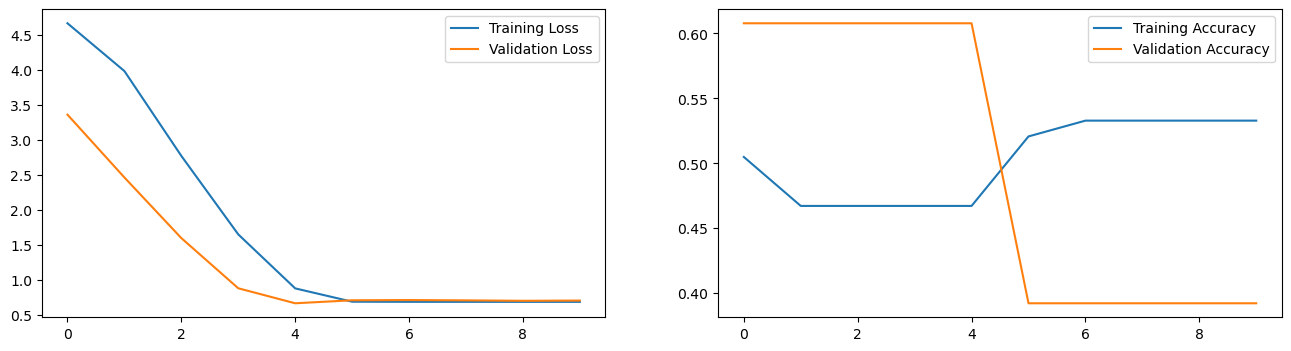

In [411]:
plot_history(history4_1)

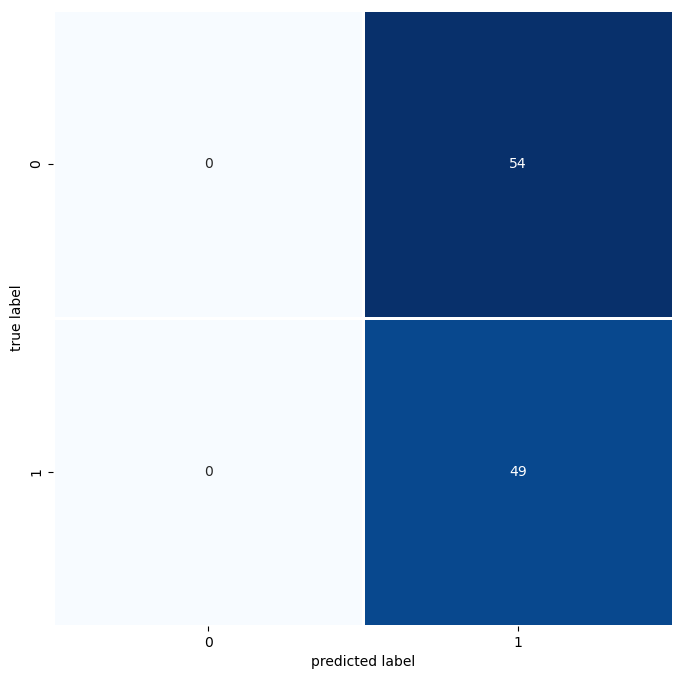

In [412]:
plot_confusion_matrix(y_true,y_pred)

VGG16

In [373]:
# Load pre-trained VGG16 model (without top classification layer)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification head
model4_2 = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 classes for Horses vs Humans
])

In [376]:
model4_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [377]:
start_time = time.time()
history4_2 = model4_2.fit(train_ds, epochs=10, 
                    validation_data=val_ds, verbose=1)
end_time = time.time()
second_elapsed_4_2 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_4_2}s')

Epoch 1/10
26/26 [==============================] - 79s 3s/step - loss: 0.6340 - accuracy: 0.8491 - val_loss: 0.0825 - val_accuracy: 0.9706
Epoch 2/10
26/26 [==============================] - 74s 3s/step - loss: 0.0154 - accuracy: 0.9988 - val_loss: 0.0595 - val_accuracy: 0.9804
Epoch 3/10
26/26 [==============================] - 75s 3s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 0.9804
Epoch 4/10
26/26 [==============================] - 78s 3s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0528 - val_accuracy: 0.9804
Epoch 5/10
26/26 [==============================] - 77s 3s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9804
Epoch 6/10
26/26 [==============================] - 74s 3s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9804
Epoch 7/10
26/26 [==============================] - 75s 3s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9804
Epoch 8/10
26/26 [==

In [378]:
test_loss4_2, test_acc4_2 = model4_2.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc4_2}, Test loss: {test_loss4_2}")

4/4 - 9s - loss: 0.0392 - accuracy: 0.9903 - 9s/epoch - 2s/step
Test accuracy: 0.9902912378311157, Test loss: 0.039229873567819595


In [409]:
y_true = []
y_pred2 = []

for images, labels in test_ds:
    predictions = model4_2.predict(images)
    y_true.extend(labels.numpy())
    y_pred2.extend(np.round(predictions).flatten())  # Round to get binary labels

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred2 = np.array(y_pred2)

# Generate the classification report
target_names = ['Horse', 'Human']
report = classification_report(y_true, y_pred2, target_names=target_names)
print(report)

1/1 [==============================] - 1s 713ms/step
              precision    recall  f1-score   support

       Horse       1.00      0.98      0.99        54
       Human       0.98      1.00      0.99        49

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



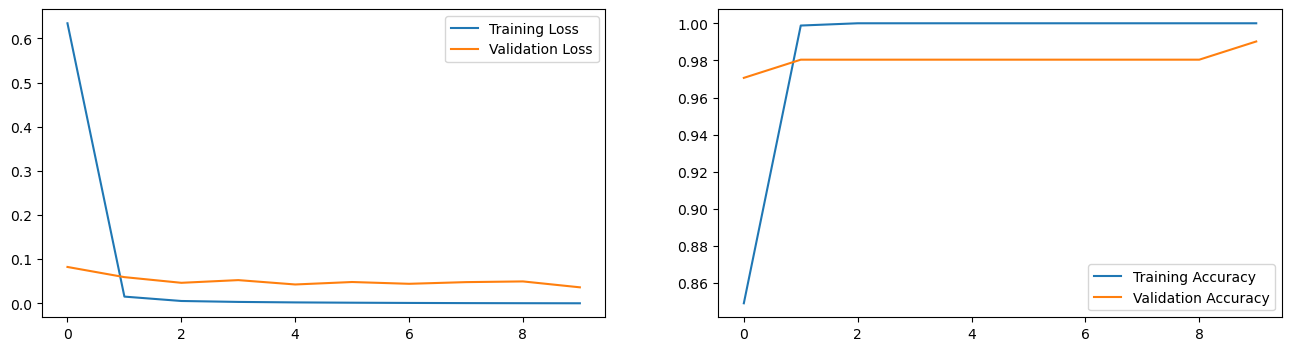

In [392]:
plot_history(history4_2)

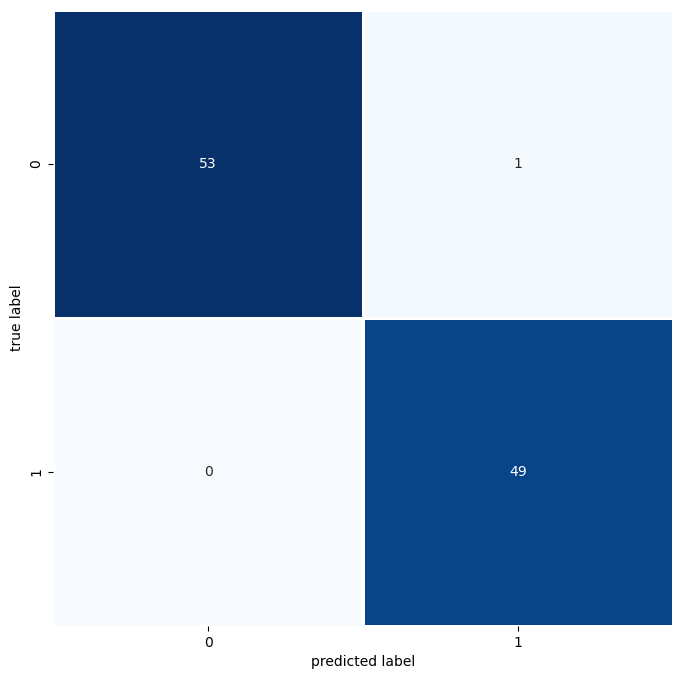

In [413]:
plot_confusion_matrix(y_true,y_pred2)

InceptionV3

In [414]:
# Define the InceptionV3 model
def build_inceptionv3_2(input_shape):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs=base_model.input, outputs=outputs)
    
    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    return model

input_shape = (128, 128, 3)
model4_3 = build_inceptionv3_2(input_shape)

In [415]:
model4_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [416]:
start_time = time.time()
history4_3 = model4_3.fit(train_ds, epochs=10, 
                    validation_data=val_ds, verbose=1)
end_time = time.time()
second_elapsed_4_3 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_4_3}s')

Epoch 1/10
26/26 [==============================] - 33s 791ms/step - loss: 0.4979 - accuracy: 0.9148 - val_loss: 0.2194 - val_accuracy: 0.9804
Epoch 2/10
26/26 [==============================] - 16s 602ms/step - loss: 0.0668 - accuracy: 0.9915 - val_loss: 0.0601 - val_accuracy: 0.9902
Epoch 3/10
26/26 [==============================] - 16s 613ms/step - loss: 0.0019 - accuracy: 0.9988 - val_loss: 0.0319 - val_accuracy: 0.9804
Epoch 4/10
26/26 [==============================] - 16s 594ms/step - loss: 0.0024 - accuracy: 0.9988 - val_loss: 0.0379 - val_accuracy: 0.9902
Epoch 5/10
26/26 [==============================] - 16s 594ms/step - loss: 5.0208e-04 - accuracy: 1.0000 - val_loss: 0.0261 - val_accuracy: 0.9902
Epoch 6/10
26/26 [==============================] - 15s 581ms/step - loss: 4.5038e-04 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9902
Epoch 7/10
26/26 [==============================] - 16s 601ms/step - loss: 0.0029 - accuracy: 0.9976 - val_loss: 0.0097 - val_accuracy

In [417]:
test_loss4_3, test_acc4_3 = model4_3.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc4_3}, Test loss: {test_loss4_3}")

4/4 - 2s - loss: 3.6139e-05 - accuracy: 1.0000 - 2s/epoch - 529ms/step
Test accuracy: 1.0, Test loss: 3.613940498325974e-05


In [420]:
y_pred3 = []

for images, labels in test_ds:
    predictions = model4_3.predict(images)
    y_pred3.extend(np.round(predictions).flatten())  # Round to get binary labels

# Convert lists to numpy arrays
y_pred3 = np.array(y_pred3)

# Generate the classification report
report = classification_report(y_true, y_pred3, target_names=target_names)
print(report)

1/1 [==============================] - 4s 4s/step
              precision    recall  f1-score   support

       Horse       1.00      1.00      1.00        54
       Human       1.00      1.00      1.00        49

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



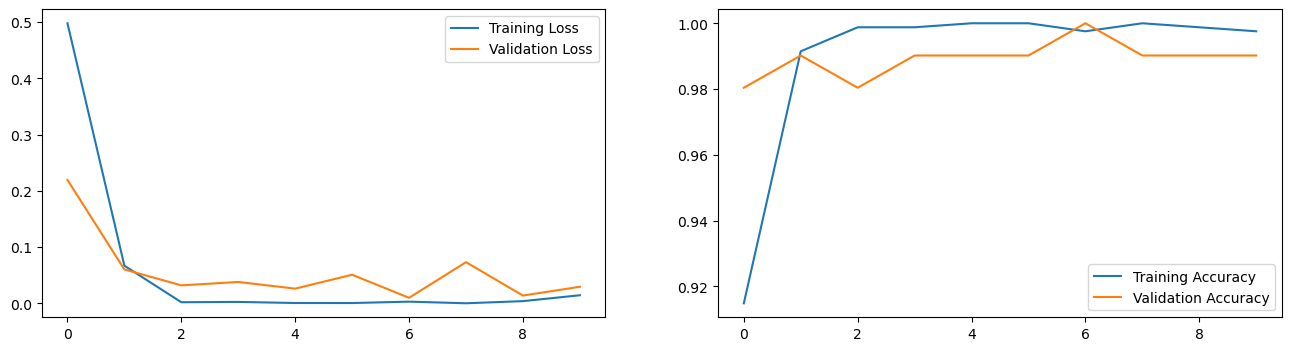

In [418]:
plot_history(history4_3)

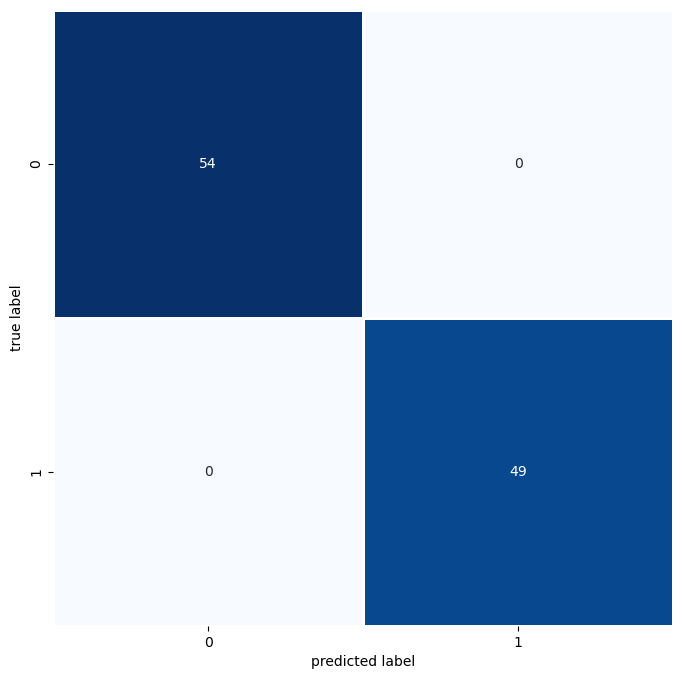

In [421]:
plot_confusion_matrix(y_true,y_pred3)

ResNet50

In [422]:
# Load pre-trained ResNet50 model (without top classification layer)
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze convolutional layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom classification head
model4_4 = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  #1 class
])

In [423]:
model4_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [424]:
start_time = time.time()
history4_4 = model4_4.fit(train_ds, epochs=10, 
                    validation_data=val_ds, verbose=1)
end_time = time.time()
second_elapsed_4_4 = round(end_time - start_time)

print(f'Finished model training in {second_elapsed_4_4}s')

Epoch 1/10
26/26 [==============================] - 34s 1s/step - loss: 1.0007 - accuracy: 0.5718 - val_loss: 0.4783 - val_accuracy: 0.8039
Epoch 2/10
26/26 [==============================] - 27s 1s/step - loss: 0.4298 - accuracy: 0.8175 - val_loss: 0.4967 - val_accuracy: 0.7255
Epoch 3/10
26/26 [==============================] - 30s 1s/step - loss: 0.3434 - accuracy: 0.8869 - val_loss: 0.3653 - val_accuracy: 0.8431
Epoch 4/10
26/26 [==============================] - 33s 1s/step - loss: 0.3282 - accuracy: 0.8601 - val_loss: 0.2573 - val_accuracy: 0.9314
Epoch 5/10
26/26 [==============================] - 26s 1s/step - loss: 0.2566 - accuracy: 0.9112 - val_loss: 0.2436 - val_accuracy: 0.9216
Epoch 6/10
26/26 [==============================] - 25s 958ms/step - loss: 0.2111 - accuracy: 0.9489 - val_loss: 0.2157 - val_accuracy: 0.9216
Epoch 7/10
26/26 [==============================] - 25s 956ms/step - loss: 0.1885 - accuracy: 0.9562 - val_loss: 0.1931 - val_accuracy: 0.9412
Epoch 8/10
26/

In [425]:
test_loss4_4, test_acc4_4 = model4_4.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc4_4}, Test loss: {test_loss4_4}")

4/4 - 3s - loss: 0.1832 - accuracy: 0.9320 - 3s/epoch - 728ms/step
Test accuracy: 0.9320388436317444, Test loss: 0.18317894637584686


In [426]:
y_pred4 = []

for images, labels in test_ds:
    predictions = model4_4.predict(images)
    y_pred4.extend(np.round(predictions).flatten())  # Round to get binary labels

# Convert lists to numpy arrays
y_pred4 = np.array(y_pred4)

# Generate the classification report
report = classification_report(y_true, y_pred4, target_names=target_names)
print(report)

1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

       Horse       1.00      0.87      0.93        54
       Human       0.88      1.00      0.93        49

    accuracy                           0.93       103
   macro avg       0.94      0.94      0.93       103
weighted avg       0.94      0.93      0.93       103



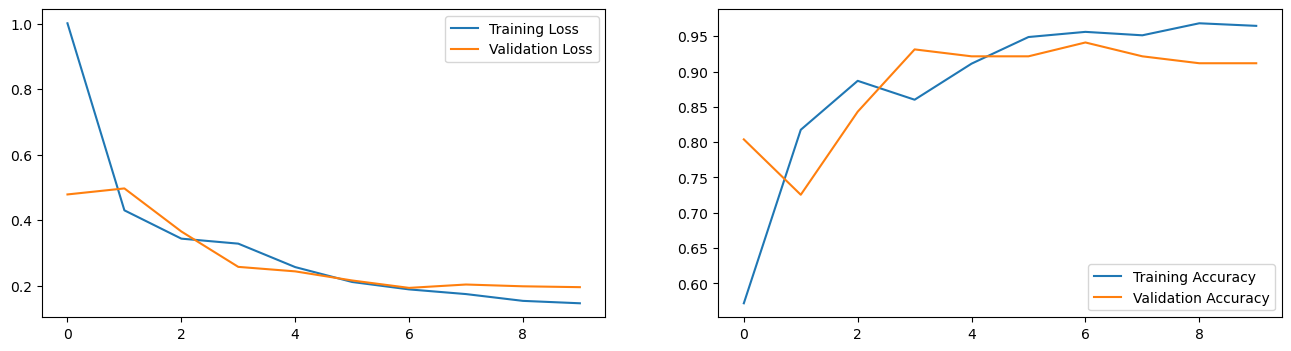

In [427]:
plot_history(history4_4)

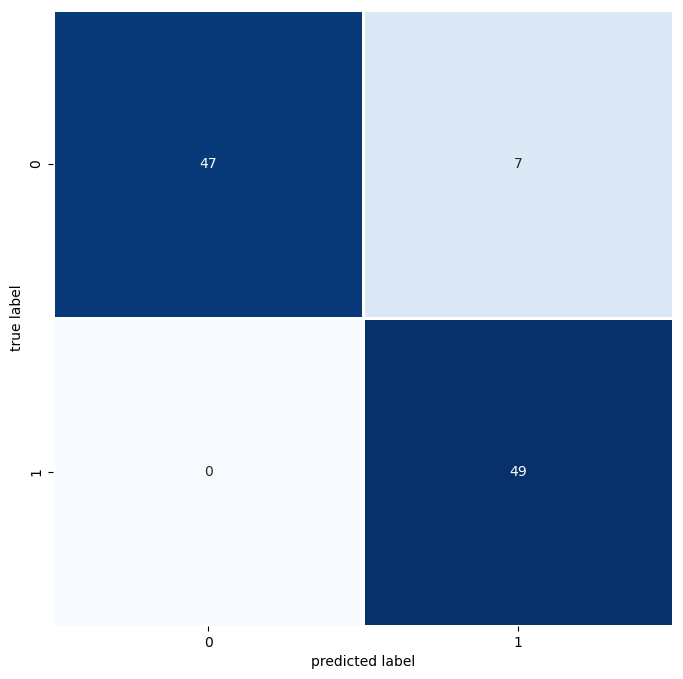

In [428]:
plot_confusion_matrix(y_true,y_pred4)

In [430]:
model1_1.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_243 (Conv2D)         (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_54 (Aver  (None, 16, 16, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_244 (Conv2D)         (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_55 (Aver  (None, 6, 6, 16)          0         
 agePooling2D)                                                   
                                                                 
 conv2d_245 (Conv2D)         (None, 2, 2, 120)         48120     
                                                                 
 flatten_27 (Flatten)        (None, 480)             

In [431]:
model1_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 267786 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [432]:
model1_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 37, 37, 32)           864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d_9[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalization[0]

In [433]:
model1_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dense_27 (Dense)            (None, 10)                5130      
                                                                 
Total params: 24641930 (94.00 MB)
Trainable params: 1054218 (4.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Results Table

In [434]:
table = {
    "Model": ["LeNet5-Cifar", "VGG16-Cifar", "InceptionV3-Cifar", "ResNet50-Cifar", "LeNet5-DvC",
              "VGG16-DvC", "InceptionV3-DvC", "ResNet50-DvC", "LeNet5-Eurosat", "Vgg16-Eurosat",
              "InceptionV3-Eurosat", "ResNet50-Eurosat", "LeNet5-HvH", "VGG16-HvH", "InceptionV3-HvH", "ResNet50-HvH"],
    "Train Accuracy": [history1_1.history['accuracy'][9],history1_2.history['accuracy'][9],history1_3.history['accuracy'][9],
                      history1_4.history['accuracy'][9],history2_1.history['accuracy'][9],history2_2.history['accuracy'][9],
                      history2_3.history['accuracy'][9],history2_4.history['accuracy'][9],history3_1.history['accuracy'][9],
                      history3_2.history['accuracy'][9],history3_3.history['accuracy'][9],history3_4.history['accuracy'][9],
                      history4_1.history['accuracy'][9],history4_2.history['accuracy'][9],history4_3.history['accuracy'][9],history4_4.history['accuracy'][9]],
    "Train Loss": [history1_1.history['loss'][9],history1_2.history['loss'][9],history1_3.history['loss'][9],
                      history1_4.history['loss'][9],history2_1.history['loss'][9],history2_2.history['loss'][9],
                      history2_3.history['loss'][9],history2_4.history['loss'][9],history3_1.history['loss'][9],
                      history3_2.history['loss'][9],history3_3.history['loss'][9],history3_4.history['loss'][9],
                      history4_1.history['loss'][9],history4_2.history['loss'][9],history4_3.history['loss'][9],history4_4.history['loss'][9]],
    "Validation Accuracy":[history1_1.history['val_accuracy'][9],history1_2.history['val_accuracy'][9],history1_3.history['val_accuracy'][9],
                      history1_4.history['val_accuracy'][9],history2_1.history['val_accuracy'][9],history2_2.history['val_accuracy'][9],
                      history2_3.history['val_accuracy'][9],history2_4.history['val_accuracy'][9],history3_1.history['val_accuracy'][9],
                      history3_2.history['val_accuracy'][9],history3_3.history['val_accuracy'][9],history3_4.history['val_accuracy'][9],
                      history4_1.history['val_accuracy'][9],history4_2.history['val_accuracy'][9],history4_3.history['val_accuracy'][9],history4_4.history['val_accuracy'][9]],
    "Validation Loss": [history1_1.history['val_loss'][9],history1_2.history['val_loss'][9],history1_3.history['val_loss'][9],
                      history1_4.history['val_loss'][9],history2_1.history['val_loss'][9],history2_2.history['val_loss'][9],
                      history2_3.history['val_loss'][9],history2_4.history['val_loss'][9],history3_1.history['val_loss'][9],
                      history3_2.history['val_loss'][9],history3_3.history['val_loss'][9],history3_4.history['val_loss'][9],
                      history4_1.history['val_loss'][9],history4_2.history['val_loss'][9],history4_3.history['val_loss'][9],history4_4.history['val_loss'][9]],
    "Test Accuracy": [test_acc1_1,test_acc1_2,test_acc1_3,test_acc1_4,test_acc2_1,
                     test_acc2_2,test_acc2_3,test_acc2_4,test_acc3_1,test_acc3_2,
                     test_acc3_3, test_acc3_4,test_acc4_1,test_acc4_2,test_acc4_3,test_acc4_4],
    "Test Loss": [test_loss1_1,test_loss1_2,test_loss1_3,test_loss1_4,test_loss2_1,
                 test_loss2_2,test_loss2_3,test_loss2_4,test_loss3_1,test_loss3_2,
                 test_loss3_3,test_loss3_4,test_loss4_1,test_loss4_2,test_loss4_3,test_loss4_4],
    "Process Time (s)":[second_elapsed_1_4,second_elapsed_1_2,second_elapsed_1_3,second_elapsed_1_4,second_elapsed_2_1,
                   second_elapsed_2_2,second_elapsed_2_3,second_elapsed_2_4,second_elapsed_3_1,second_elapsed_3_2,
                   second_elapsed_3_3,second_elapsed_3_4,second_elapsed_4_1,second_elapsed_4_2,second_elapsed_4_3,second_elapsed_4_4]
}


In [435]:
df = pd.DataFrame(table)

# Display the DataFrame
print(df)

                  Model  Train Accuracy  Train Loss  Validation Accuracy  \
0          LeNet5-Cifar        0.594133    1.151153             0.536800   
1           VGG16-Cifar        0.729600    0.767658             0.613600   
2     InceptionV3-Cifar        0.800578    0.560641             0.632200   
3        ResNet50-Cifar        0.384143    1.714115             0.379012   
4            LeNet5-DvC        0.485625    0.695398             0.495000   
5             VGG16-DvC        0.898750    0.226135             0.916875   
6       InceptionV3-DvC        0.976562    0.057199             0.976250   
7          ResNet50-DvC        0.635364    0.692435             0.673125   
8        LeNet5-Eurosat        0.538323    1.304605             0.462037   
9         Vgg16-Eurosat        0.937500    0.182745             0.864815   
10  InceptionV3-Eurosat        0.930041    0.201293             0.809722   
11     ResNet50-Eurosat        0.573765    1.173917             0.580093   
12          

In [436]:
from IPython.display import HTML

# Convert DataFrame to HTML with smaller font size
html_table = df.to_html(index=False, classes='table table-striped table-bordered', col_space=100, justify='center')

# Apply CSS to the HTML table to set font size
html_table = html_table.replace('<th>', '<th style="font-size: 10px;">')
html_table = html_table.replace('<td>', '<td style="font-size: 10px;">')

# Display the HTML table
HTML(html_table)